In [1]:
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
data = pd.read_csv('train_2v.csv')
test_data = pd.read_csv('test_2v.csv')

In [3]:
data['source'] = 'train'
test_data['source'] = 'test'
merged = pd.concat([data, test_data], ignore_index = True)
print ('Merged shape = ', merged.shape, '\n', 'Train shape = ', data.shape, '\n', 'Test shape = ', test_data.shape)

Merged shape =  (62001, 13) 
 Train shape =  (43400, 13) 
 Test shape =  (18601, 12)


In [4]:
merged.head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
0,Rural,3.0,95.12,18.0,No,Male,0,0,30669,NaN,train,0.0,children
1,Urban,58.0,87.96,39.2,Yes,Male,0,1,30468,never smoked,train,0.0,Private
2,Urban,8.0,110.89,17.6,No,Female,0,0,16523,NaN,train,0.0,Private
3,Rural,70.0,69.04,35.9,Yes,Female,0,0,56543,formerly smoked,train,0.0,Private
4,Rural,14.0,161.28,19.1,No,Male,0,0,46136,NaN,train,0.0,Never_worked


In [5]:
merged.describe()

,age,avg_glucose_level,bmi,heart_disease,hypertension,id,stroke
count,62001.000000,62001.000000,59948.000000,62001.000000,62001.000000,62001.000000,43400.000000
mean,42.169475,104.453832,28.587099,0.047677,0.093450,36452.514814,0.018041
std,22.522100,42.960537,7.766122,0.213083,0.291065,21067.155945,0.133103
min,0.080000,55.000000,10.100000,0.000000,0.000000,1.000000,0.000000
25%,24.000000,77.540000,23.200000,0.000000,0.000000,18187.000000,0.000000
50%,44.000000,91.660000,27.700000,0.000000,0.000000,36463.000000,0.000000
75%,60.000000,112.120000,32.800000,0.000000,0.000000,54693.000000,0.000000
max,82.000000,291.050000,97.600000,1.000000,1.000000,72943.000000,1.000000


In [6]:
merged.corr('pearson')

,age,avg_glucose_level,bmi,heart_disease,hypertension,id,stroke
age,1.000000,0.236249,0.361104,0.250495,0.272231,0.010088,0.156049
avg_glucose_level,0.236249,1.000000,0.192792,0.142068,0.162159,0.023636,0.078917
bmi,0.361104,0.192792,1.000000,0.061587,0.162886,0.014133,0.020285
heart_disease,0.250495,0.142068,0.061587,1.000000,0.124246,0.009341,0.113763
hypertension,0.272231,0.162159,0.162886,0.124246,1.000000,0.003710,0.075332
id,0.010088,0.023636,0.014133,0.009341,0.003710,1.000000,0.002976
stroke,0.156049,0.078917,0.020285,0.113763,0.075332,0.002976,1.000000


In [7]:
merged.corr('pearson')['stroke']

age                  0.156049
avg_glucose_level    0.078917
bmi                  0.020285
heart_disease        0.113763
hypertension         0.075332
id                   0.002976
stroke               1.000000
Name: stroke, dtype: float64

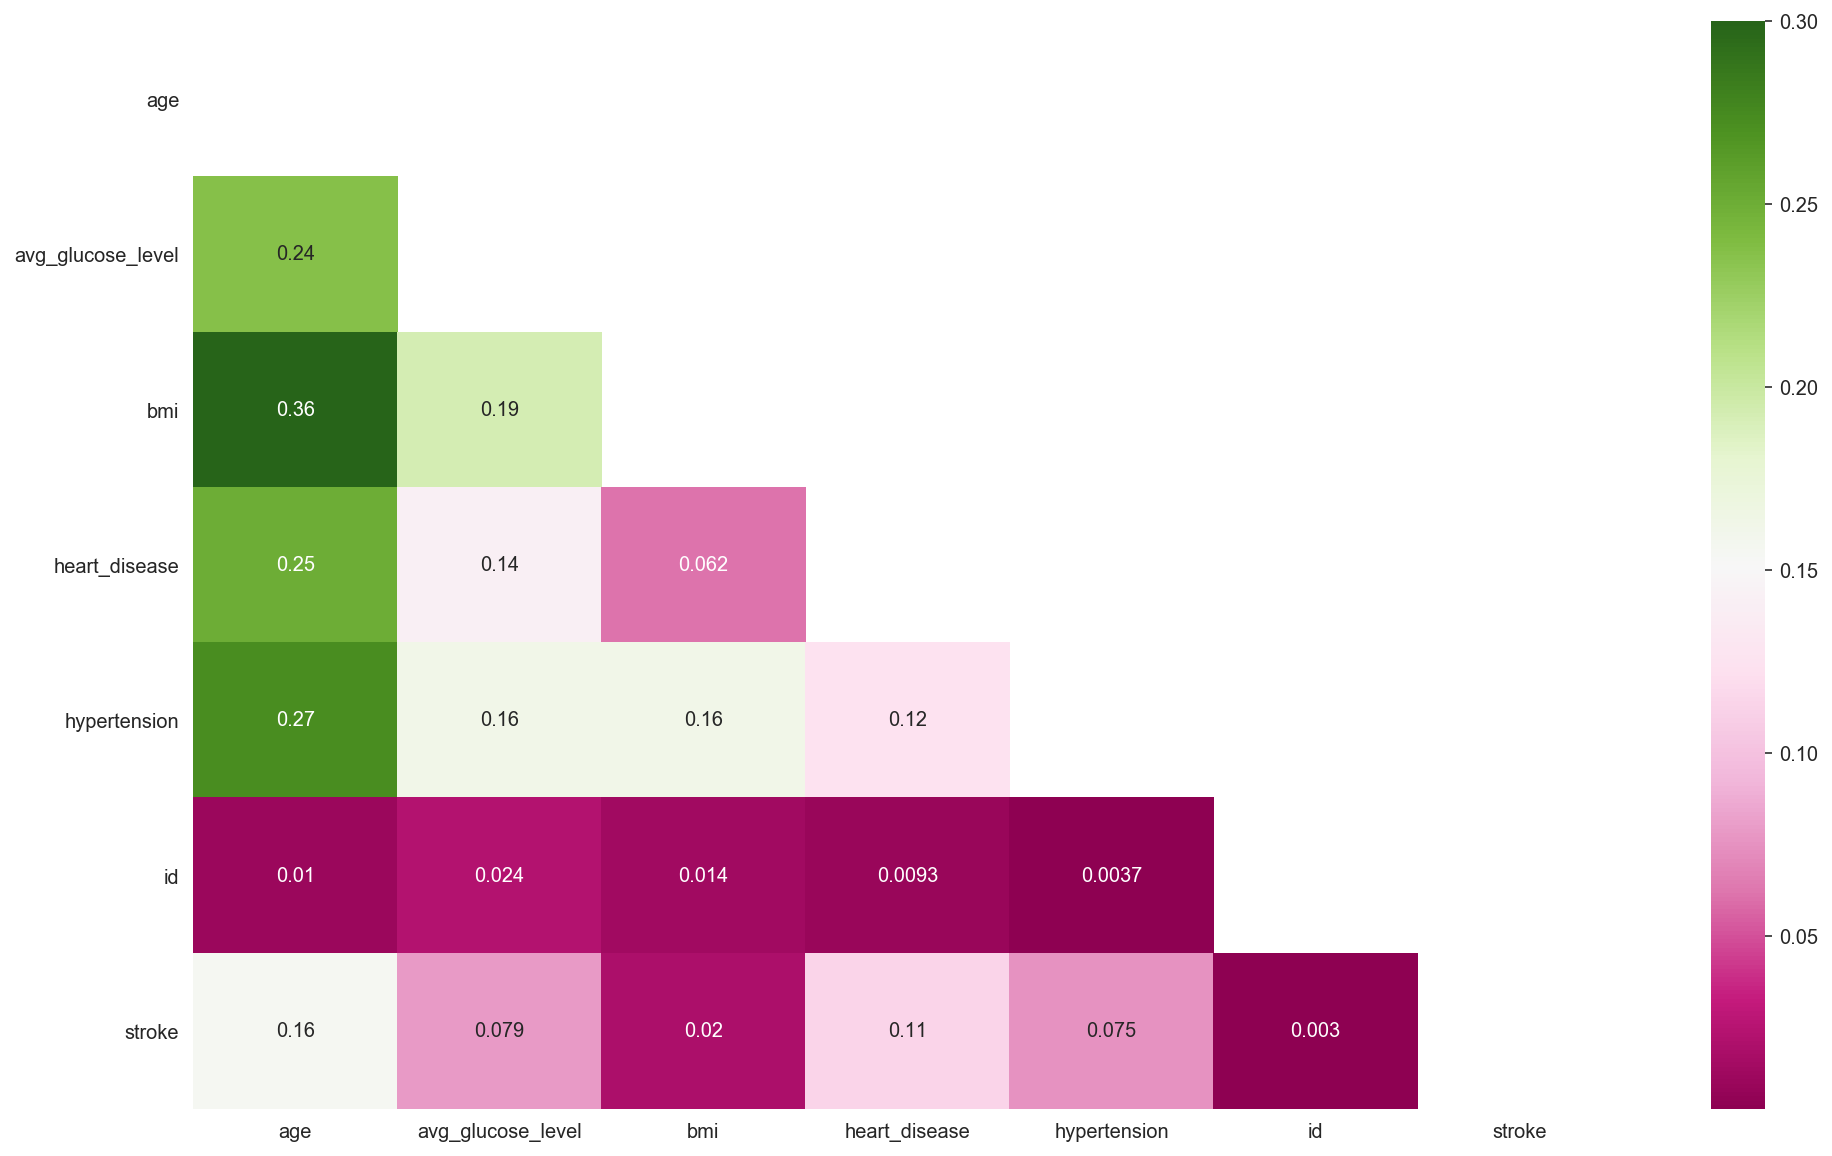

In [8]:
plt.figure(figsize = (16,10))
# to generate the mask effect
mask = np.zeros_like(merged.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(merged.corr(), mask=mask, vmax=0.3, annot = True, cmap ='PiYG')
    plt.show();

In [9]:
print ('Merged data types =\n', merged.dtypes)
print ('------------------------')
print ('Null Data = ', merged.isnull().sum())

Merged data types =
 Residence_type        object
age                  float64
avg_glucose_level    float64
bmi                  float64
ever_married          object
gender                object
heart_disease          int64
hypertension           int64
id                     int64
smoking_status        object
source                object
stroke               float64
work_type             object
dtype: object
------------------------
Null Data =  Residence_type           0
age                      0
avg_glucose_level        0
bmi                   2053
ever_married             0
gender                   0
heart_disease            0
hypertension             0
id                       0
smoking_status       19043
source                   0
stroke               18601
work_type                0
dtype: int64


In [10]:
print ('Gender: ', merged['gender'].unique())
print ('Youngest = ', merged['age'].min())
print ('Eldest = ', merged['age'].max())
print ('Marriage status: ', merged['ever_married'].unique())
print ('Types of work: ', merged['work_type'].unique())
print ('Types of residence: ', merged['Residence_type'].unique())
print ('Min average glucose level: ', merged['avg_glucose_level'].min())
print ('Max average glucose level: ', merged['avg_glucose_level'].max())
print ('Min BMI: ', merged['bmi'].min())
print ('Max BMI: ', merged['bmi'].max())
print ('Smoking Status: ', merged['smoking_status'].unique())

Gender:  ['Male' 'Female' 'Other']
Youngest =  0.08
Eldest =  82.0
Marriage status:  ['No' 'Yes']
Types of work:  ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Types of residence:  ['Rural' 'Urban']
Min average glucose level:  55.0
Max average glucose level:  291.05
Min BMI:  10.1
Max BMI:  97.6
Smoking Status:  [nan 'never smoked' 'formerly smoked' 'smokes']


In [11]:
len(merged[merged['stroke'] == 1])

783

In [12]:
len(merged[merged['stroke'] == 0])

42617

In [29]:
(783 / (783 + 42617))*100

1.804147465437788

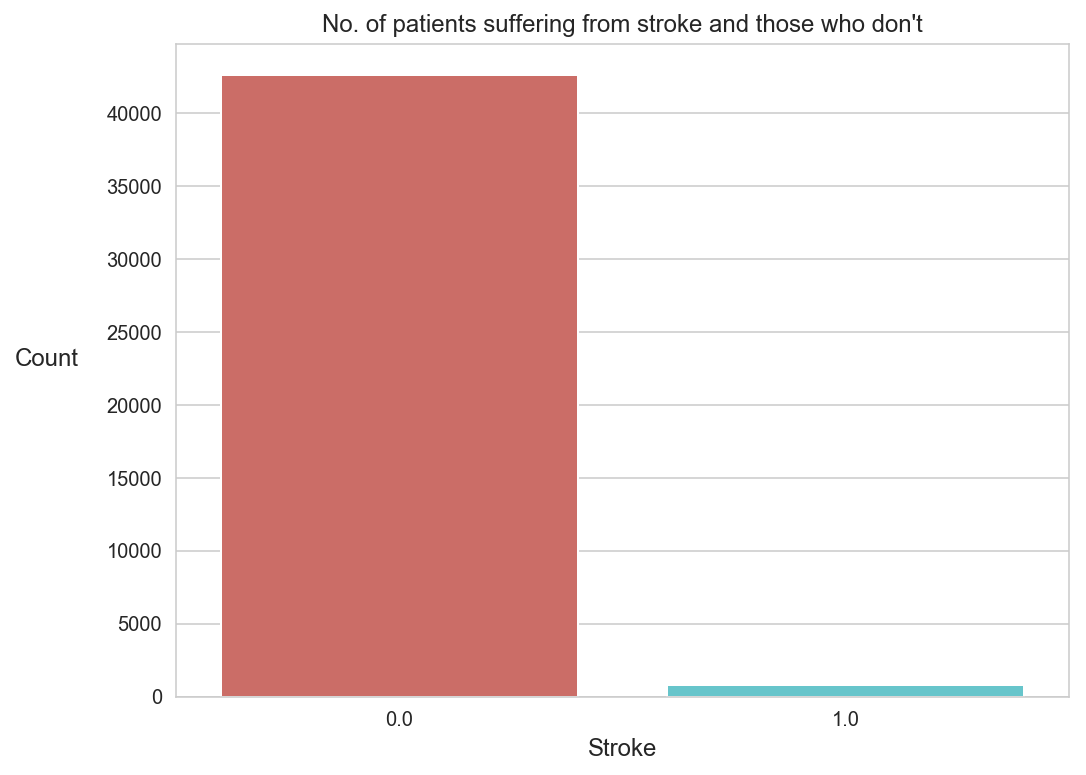

In [27]:
plt.figure(figsize = (8,6))
sns.countplot(x="stroke", data=merged, palette = 'hls')
plt.title("No. of patients suffering from stroke and those who don't")
plt.xlabel('Stroke', fontsize = 12)
plt.ylabel('Count', fontsize = 12, rotation = 360, labelpad = 30)
plt.show();
plt.savefig('count plot for target variable')

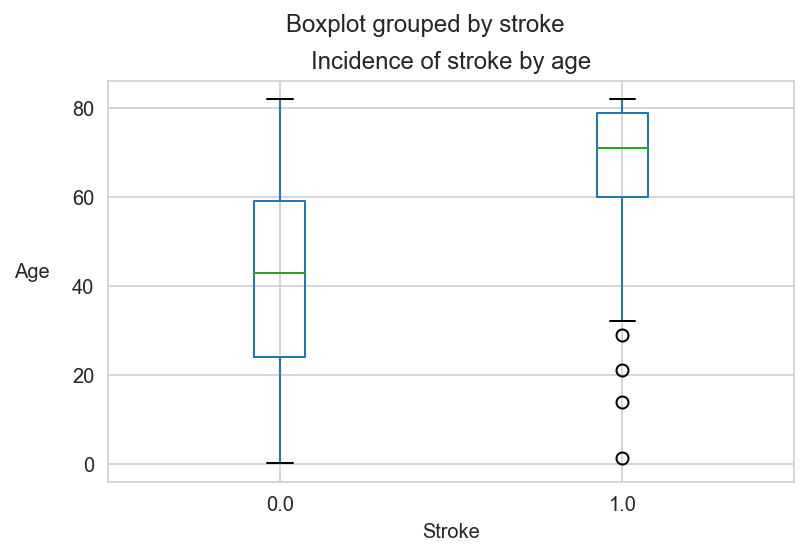

In [17]:
merged.boxplot(column='age',by='stroke')
plt.title('Incidence of stroke by age')
plt.xlabel('Stroke')
plt.ylabel('Age', rotation = 360, labelpad = 20)
plt.tight_layout(rect=[0, 0.03, 0.96, 0.95]);

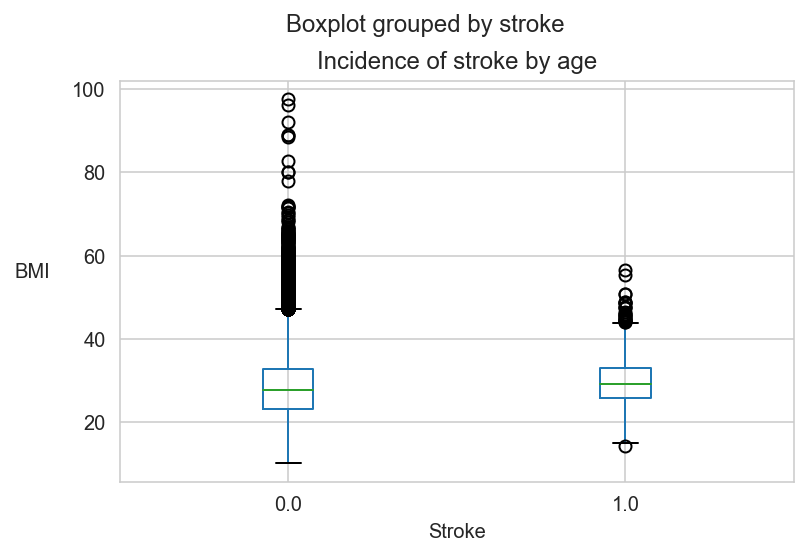

In [19]:
merged.boxplot(column='bmi',by='stroke')
plt.title('Incidence of stroke by age')
plt.xlabel('Stroke')
plt.ylabel('BMI', rotation = 360, labelpad = 20)
plt.tight_layout(rect=[0, 0.03, 0.96, 0.95]);

In [28]:
merged.loc[(merged['work_type'] != 'children') & (merged['stroke'] == 1)]

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
63,Urban,67.0,228.69,36.6,Yes,Male,1,0,9046,formerly smoked,train,1.0,Private
81,Rural,61.0,202.21,NaN,Yes,Female,0,0,51676,never smoked,train,1.0,Self-employed
141,Rural,80.0,105.92,32.5,Yes,Male,1,0,31112,never smoked,train,1.0,Private
257,Urban,49.0,171.23,34.4,Yes,Female,0,0,60182,smokes,train,1.0,Private
264,Rural,79.0,174.12,24.0,Yes,Female,0,1,1665,never smoked,train,1.0,Self-employed
288,Urban,81.0,186.21,29.0,Yes,Male,0,0,56669,formerly smoked,train,1.0,Private
291,Rural,74.0,70.09,27.4,Yes,Male,1,1,53882,never smoked,train,1.0,Private
320,Urban,69.0,94.39,22.8,No,Female,0,0,10434,never smoked,train,1.0,Private
407,Rural,59.0,76.15,NaN,Yes,Female,0,0,27419,NaN,train,1.0,Private
426,Urban,78.0,58.57,24.2,Yes,Female,0,0,60491,NaN,train,1.0,Private


## <font color = red>Gender: Other. Is there significance?<font>

In [20]:
# Gender other and stroke incidence? Answer: None
merged.loc[(merged['gender'] == 'Other') & (merged['stroke'] == 1)]

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type


In [97]:
merged[(merged['age'] < 20.0) & (merged['gender'] == 'Other')]['bmi'].mean()

22.125

In [98]:
merged[(merged['age'] < 20.0) & (merged['gender'] == 'Female') & (merged['smoking_status'] == 'smokes')]['bmi'].mean()

26.852317880794693

In [99]:
merged[(merged['age'] < 20.0) & (merged['gender'] == 'Female') & (merged['smoking_status'] == 'never smoked')]['bmi'].mean()

25.2113827349121

In [100]:
merged[(merged['age'] < 20.0) & (merged['gender'] == 'Female') & (merged['smoking_status'] == 'formerly smoked')]['bmi'].mean()

25.437128712871274

In [101]:
merged[(merged['age'] < 20.0) & (merged['gender'] == 'Male') & (merged['smoking_status'] == 'smokes')]['bmi'].mean()

25.948979591836725

In [102]:
merged[(merged['age'] < 20.0) & (merged['gender'] == 'Male') & (merged['smoking_status'] == 'never smoked')]['bmi'].mean()

24.92434869739478

In [103]:
merged[(merged['age'] < 20.0) & (merged['gender'] == 'Male') & (merged['smoking_status'] == 'formerly smoked')]['bmi'].mean()

25.022580645161288

In [104]:
merged[(merged['age'] >= 20.0) & (merged['age'] <= 65.0) & (merged['gender'] == 'Male') & (merged['smoking_status'] == 'smokes')]['bmi'].mean()

30.291420490257668

In [106]:
merged[(merged['age'] >= 20.0) & (merged['age'] <= 65.0) & (merged['gender'] == 'Male') & (merged['smoking_status'] == 'never smoked')]['bmi'].mean()

30.92334004024144

In [107]:
merged[(merged['age'] >= 20.0) & (merged['age'] <= 65.0) & (merged['gender'] == 'Male') & (merged['smoking_status'] == 'formerly smoked')]['bmi'].mean()

31.789920520231234

In [108]:
merged[(merged['age'] >= 20.0) & (merged['age'] <= 65.0) & (merged['gender'] == 'Female') & (merged['smoking_status'] == 'smokes')]['bmi'].mean()

30.189313517338952

In [109]:
merged[(merged['age'] >= 20.0) & (merged['age'] <= 65.0) & (merged['gender'] == 'Female') & (merged['smoking_status'] == 'never smoked')]['bmi'].mean()

30.327402465017197

In [110]:
merged[(merged['age'] >= 20.0) & (merged['age'] <= 65.0) & (merged['gender'] == 'Female') & (merged['smoking_status'] == 'formerly smoked')]['bmi'].mean()

31.325308324768766

In [111]:
merged[(merged['age'] >= 20.0) & (merged['age'] <= 65.0) & (merged['gender'] == 'Other')]['bmi'].mean()

30.95

In [21]:
merged.loc[(merged['gender'] == 'Other') & (merged['stroke'] == 0)].head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
2914,Rural,26.0,143.33,22.4,No,Other,0,0,56156,formerly smoked,train,0.0,Private
10768,Rural,46.0,83.28,NaN,No,Other,0,0,26188,never smoked,train,0.0,Private
15620,Urban,27.0,62.45,NaN,No,Other,0,0,52984,smokes,train,0.0,Private
15838,Rural,53.0,89.65,NaN,Yes,Other,0,0,24893,NaN,train,0.0,Private
19748,Urban,39.0,95.59,32.0,Yes,Other,0,0,13471,formerly smoked,train,0.0,Govt_job


In [22]:
merged.groupby(['gender']).size()

gender
Female    36622
Male      25366
Other        13
dtype: int64

In [23]:
merged.groupby(['gender'])['stroke'].sum()

gender
Female    431.0
Male      352.0
Other       0.0
Name: stroke, dtype: float64

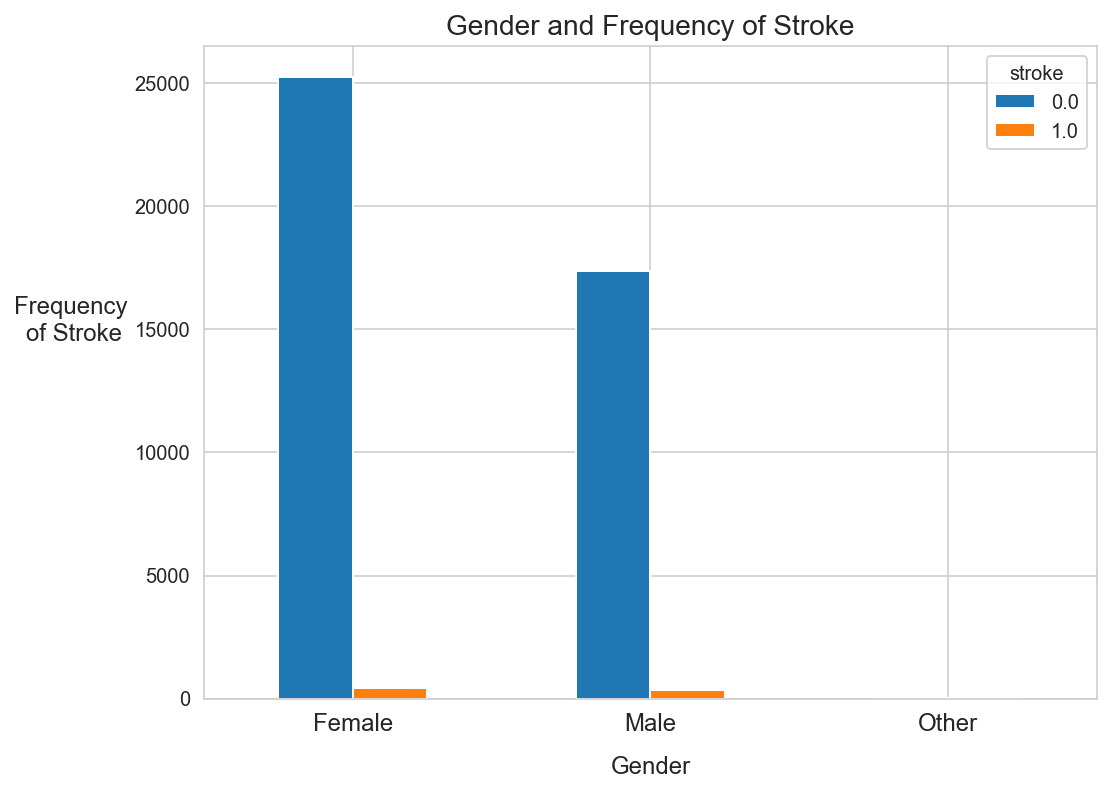

In [24]:
pd.crosstab(merged['gender'], merged['stroke']).plot(kind = 'bar', figsize = (8,6))
plt.title('Gender and Frequency of Stroke', fontsize = 14)
plt.xlabel('Gender', fontsize = 12, labelpad = 10)
plt.xticks(rotation=0, fontsize = 12)
plt.ylabel('Frequency \nof Stroke\n', fontsize = 12, rotation = 360, labelpad = 30)
plt.savefig('Gender_&_Frequency_of_Stroke')

In [25]:
res = pd.crosstab(merged['gender'], merged['stroke'])
print (res)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res)

print ('chi2 = ', chi2, 'p-value = ', p)

stroke    0.0  1.0
gender            
Female  25234  431
Male    17372  352
Other      11    0
chi2 =  5.767894799445178 p-value =  0.05591361325694649


### <font color = blue>Conclusion: can exclude dummy col Gender ['Other'] as there's no significance. Also, gender does not play a significant role in stroke but it does to BMI.<font>

## <font color = red>Children and stroke. Is there significance?<font>

In [26]:
merged.loc[(merged['work_type'] == 'children') & (merged['stroke'] == 1)]

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
9961,Urban,1.32,70.37,NaN,No,Female,0,0,69768,NaN,train,1.0,children
14802,Rural,14.00,57.93,30.9,No,Female,0,0,49669,NaN,train,1.0,children


### <font color = blue>Conclusion: There are only 2 incidence of stroke in children aged less than 20 years old. Next is to do significance testing in terms of age range<font>

## <font color = red>Average glucose level. Checking on the outlier<font>

In [27]:
merged.loc[(merged['avg_glucose_level'] == 291.05)]

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
38446,Rural,80.0,291.05,28.7,Yes,Female,0,0,56722,never smoked,train,0.0,Private


## <font color = red>BMI. Is there significance?<font>

In [28]:
merged.loc[(merged['bmi'] == 10.1)]

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
26619,Rural,39.0,75.9,10.1,Yes,Male,0,0,23130,smokes,train,0.0,Private


In [29]:
merged.loc[(merged['bmi'] == 97.6)]

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
1913,Rural,17.0,61.67,97.6,No,Male,0,1,56420,NaN,train,0.0,Private


### <font color = blue>Conclusion: Smoking can also result in loss of weight but morbidly obese person + hypertension may suggest that this person has higher prevalence of smoking. Work type might also contribute to the risk behaviour.<font>

## <font color = red>Gender and BMI. Is there significance?<font>

In [30]:
merged.groupby(['gender'])['bmi'].mean()

gender
Female    28.751502
Male      28.346916
Other     26.537500
Name: bmi, dtype: float64

In [31]:
merged1 = merged.dropna()
f_oneway(merged1['bmi'][merged1['gender'] == 'Male'], 
             merged1['bmi'][merged1['gender'] == 'Female'],
             merged1['bmi'][merged1['gender'] == 'Other'])

F_onewayResult(statistic=7.12585737713847, pvalue=0.0008054486199128714)

### <font color = blue>Conclusion: Gender plays a significant role in BMI.<font>

## <font color = red>Other conditions can contribute to stroke? Those with existing conditions like heart disease and hypertension.<font>

In [32]:
merged.groupby(['hypertension']).mean()

,age,avg_glucose_level,bmi,heart_disease,id,stroke
hypertension,,,,,,
0,40.200965,102.217161,28.195278,0.039177,36427.421834,0.014820
1,61.265792,126.151546,32.671056,0.130135,36695.939247,0.049249


In [33]:
cols = ['hypertension', 'heart_disease']
m1 = (merged.melt(id_vars='stroke', value_vars=cols)
         .groupby([pd.Grouper(key='stroke'),'variable', 'value'])
         .size()
         .unstack(level=[1,2], fill_value=0))
m1

variable heart_disease       hypertension      
value                0     1            0     1
stroke                                         
0.0              40732  1885        38756  3861
1.0                606   177          583   200

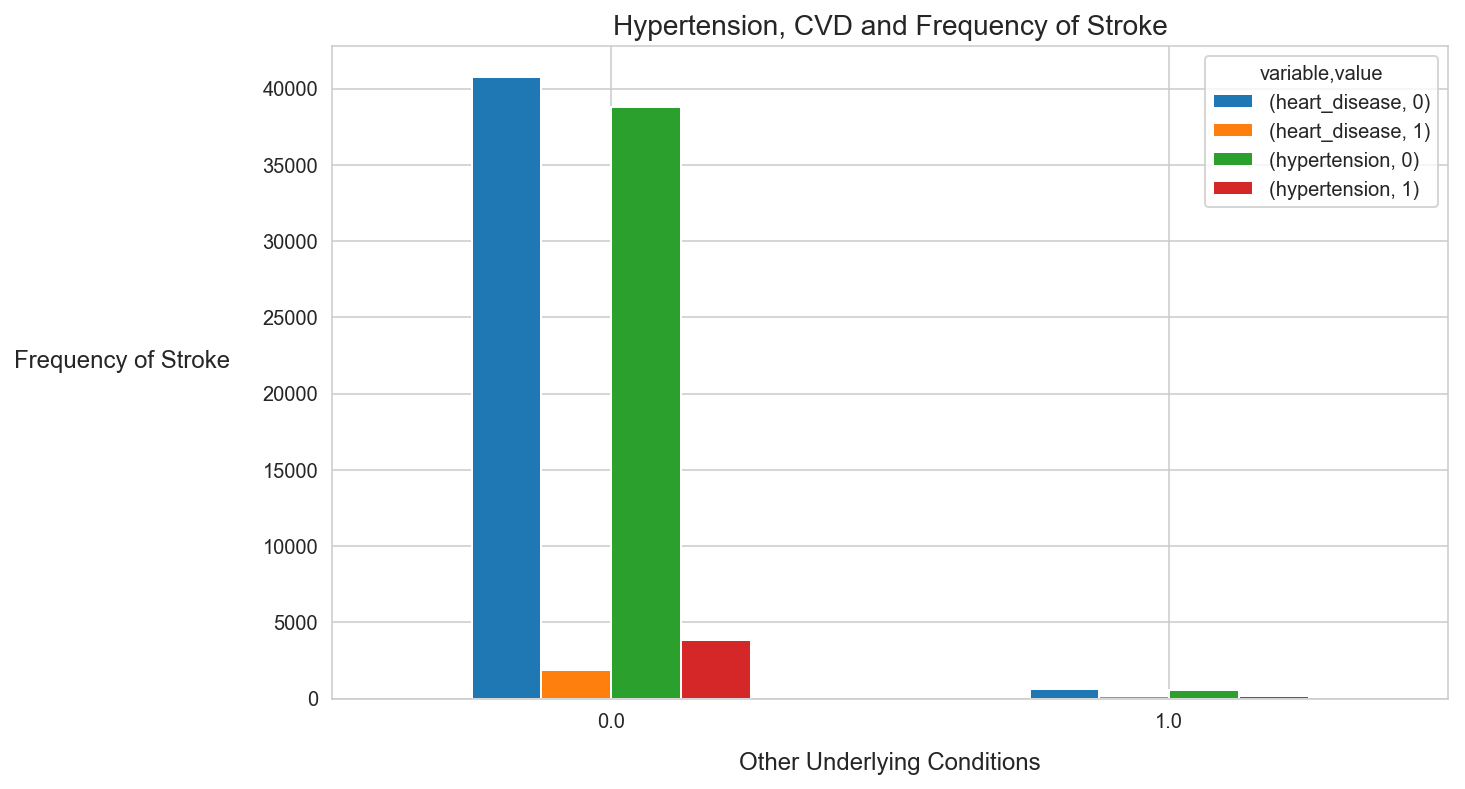

In [34]:
m1.plot(kind = 'bar', figsize = (10,6))
plt.title('Hypertension, CVD and Frequency of Stroke', fontsize = 14)
plt.xlabel('Other Underlying Conditions', fontsize = 12, labelpad = 10)
plt.xticks(rotation=0)
plt.ylabel('Frequency of Stroke', fontsize = 12, rotation = 360, labelpad = 70)
plt.savefig('Other_underlying_diseases_&_Frequency_of_Stroke');

In [36]:
res2 = pd.crosstab(merged['heart_disease'], merged['stroke'])
print (res2)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res2)

print ('chi2 = ', chi2, 'p-value = ', p)

stroke           0.0  1.0
heart_disease            
0              40732  606
1               1885  177
chi2 =  557.6724376453765 p-value =  2.6973914696311867e-123


In [37]:
res3 = pd.crosstab(merged['hypertension'], merged['stroke'])
print (res3)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res3)

print ('chi2 = ', chi2, 'p-value = ', p)

stroke          0.0  1.0
hypertension            
0             38756  583
1              3861  200
chi2 =  244.3531745585235 p-value =  4.421339862850063e-55


### <font color = blue>Conclusion: Those with underlying diseases such as heart disease and hypertension have higher prevalence of stroke incidence.<font>

## <font color = red> Lifestyle behaviors. Looking into work type, smoking, bmi and avg glucose level <font>

In [38]:
# Lifestyle behaviors
merged.groupby(['work_type'])['avg_glucose_level'].mean()

work_type
Govt_job         106.717355
Never_worked      94.440754
Private          104.762303
Self-employed    112.495995
children          92.637595
Name: avg_glucose_level, dtype: float64

In [39]:
merged.groupby(['work_type'])['bmi'].mean()

work_type
Govt_job         30.538875
Never_worked     26.064143
Private          29.963399
Self-employed    30.119716
children         19.872499
Name: bmi, dtype: float64

In [40]:
res4 = pd.crosstab(merged['smoking_status'], merged['stroke'])
print (res4)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res4)

print ('chi2 = ', chi2, 'p-value = ', p)

stroke             0.0  1.0
smoking_status             
formerly smoked   7272  221
never smoked     15769  284
smokes            6429  133
chi2 =  34.654573576807856 p-value =  2.9843857761841864e-08


In [73]:
res18 = pd.crosstab(merged['smoking_status'], merged['hypertension'])
print (res18)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res18)

print ('chi2 = ', chi2, 'p-value = ', p)

hypertension         0     1
smoking_status              
formerly smoked   9281  1472
never smoked     20368  2518
smokes            8288  1031
chi2 =  55.66530260358646 p-value =  8.173971570773442e-13


In [76]:
merged[(merged['smoking_status']=='smokes') & (merged['hypertension'] == 1)]

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
21,Rural,57.0,129.54,60.9,Yes,Female,0,1,72911,smokes,train,0.0,Private
32,Urban,58.0,55.78,27.5,No,Male,0,1,45222,smokes,train,0.0,Private
48,Rural,58.0,56.96,26.8,Yes,Male,0,1,67318,smokes,train,0.0,Govt_job
211,Urban,33.0,74.44,45.2,Yes,Female,0,1,17718,smokes,train,0.0,Private
220,Rural,61.0,170.05,60.2,Yes,Female,0,1,1307,smokes,train,0.0,Private
233,Rural,54.0,198.69,NaN,Yes,Male,0,1,15649,smokes,train,0.0,Private
260,Rural,52.0,74.64,30.7,Yes,Male,0,1,71238,smokes,train,0.0,Private
336,Urban,51.0,109.16,28.0,Yes,Female,0,1,24592,smokes,train,0.0,Private
353,Urban,63.0,105.95,23.5,Yes,Female,0,1,45585,smokes,train,0.0,Private
646,Rural,74.0,57.51,31.7,Yes,Male,0,1,52688,smokes,train,0.0,Private


In [83]:
merged[(merged['smoking_status']=='smokes') & (merged['hypertension'] == 1) & (merged['work_type'] == 'Never_worked')]

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type


In [74]:
res19 = pd.crosstab(merged['smoking_status'], merged['heart_disease'])
print (res19)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res19)

print ('chi2 = ', chi2, 'p-value = ', p)

heart_disease        0    1
smoking_status             
formerly smoked   9818  935
never smoked     22024  862
smokes            8713  606
chi2 =  355.1481372614654 p-value =  7.595596130299002e-78


In [77]:
merged[(merged['smoking_status']=='smokes') & (merged['heart_disease'] == 1)]

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
19,Urban,79.0,67.84,25.2,Yes,Female,1,0,17986,smokes,train,0.0,Self-employed
204,Rural,72.0,97.53,29.4,Yes,Male,1,0,8233,smokes,train,0.0,Self-employed
383,Urban,65.0,58.37,28.0,Yes,Male,1,0,38987,smokes,train,0.0,Self-employed
385,Rural,52.0,101.50,31.2,No,Male,1,0,5353,smokes,train,0.0,Private
627,Rural,61.0,120.46,36.8,Yes,Female,1,0,12095,smokes,train,1.0,Govt_job
654,Urban,80.0,84.31,30.3,Yes,Male,1,1,72310,smokes,train,0.0,Self-employed
687,Rural,71.0,207.32,32.4,Yes,Male,1,0,72020,smokes,train,0.0,Self-employed
804,Urban,64.0,191.61,37.5,Yes,Male,1,0,56112,smokes,train,1.0,Private
962,Rural,55.0,109.69,22.2,No,Female,1,0,70678,smokes,train,0.0,Private
1090,Rural,58.0,144.16,26.0,Yes,Female,1,0,52457,smokes,train,0.0,Private


In [87]:
merged[(merged['smoking_status']=='formerly smoked')].head()

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
3,Rural,70.0,69.04,35.9,Yes,Female,0,0,56543,formerly smoked,train,0.0,Private
6,Urban,52.0,77.59,17.7,Yes,Female,0,0,52800,formerly smoked,train,0.0,Private
11,Urban,79.0,57.08,22.0,Yes,Male,1,0,64908,formerly smoked,train,0.0,Private
13,Rural,37.0,73.50,26.1,Yes,Female,0,0,37893,formerly smoked,train,0.0,Private
23,Urban,71.0,198.21,27.3,Yes,Male,0,0,4057,formerly smoked,train,0.0,Private


In [94]:
merged[merged['smoking_status'] == 'formerly smoked']['age'].mean()

54.292197526271735

In [78]:
merged[(merged['smoking_status']=='smokes') & (merged['hypertension'] == 1) & (merged['heart_disease'] == 1)]

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,id,smoking_status,source,stroke,work_type
654,Urban,80.0,84.31,30.3,Yes,Male,1,1,72310,smokes,train,0.0,Self-employed
1529,Rural,76.0,102.08,31.0,Yes,Female,1,1,29179,smokes,train,0.0,Private
1641,Urban,53.0,196.25,24.9,Yes,Female,1,1,16066,smokes,train,0.0,Private
2220,Urban,78.0,92.90,30.4,No,Male,1,1,22136,smokes,train,0.0,Self-employed
2499,Urban,50.0,79.79,25.6,No,Female,1,1,35069,smokes,train,0.0,Govt_job
2755,Rural,55.0,64.92,32.1,Yes,Male,1,1,48922,smokes,train,0.0,Private
2872,Urban,77.0,80.92,28.9,Yes,Male,1,1,58586,smokes,train,0.0,Self-employed
3204,Rural,79.0,83.61,21.4,Yes,Female,1,1,40167,smokes,train,0.0,Govt_job
3241,Rural,71.0,67.06,26.7,Yes,Male,1,1,42251,smokes,train,0.0,Self-employed
4611,Rural,81.0,126.34,27.4,Yes,Female,1,1,70497,smokes,train,0.0,Private


In [41]:
merged.groupby(['work_type', 'smoking_status']).mean()

age  avg_glucose_level        bmi  \
work_type     smoking_status                                             
Govt_job      formerly smoked  53.430142         111.561300  31.201984   
              never smoked     47.869673         106.171343  30.635033   
              smokes           47.821045         107.267237  30.285358   
Never_worked  formerly smoked  28.800000         110.322667  30.393333   
              never smoked     17.717949          92.871111  26.127350   
              smokes           18.600000         114.992000  26.220000   
Private       formerly smoked  51.890697         110.253176  30.940151   
              never smoked     43.542215         103.886424  29.888883   
              smokes           43.882556         105.703043  29.885538   
Self-employed formerly smoked  64.272689         117.315441  30.293969   
              never smoked     58.068643         111.672626  30.257677   
              smokes           56.352122         113.489105  29.649574   
children      formerly smoked  12.423358          91.387737  22.699225   
              never smoked     12.532764          92.463803  23.082734   
              smokes           13.055556          96.657222  25.333333   

                               heart_disease  hypertension            id  \
work_type     smoking_status                                               
Govt_job      formerly smoked       0.070505      0.133894  36814.566624   
              never smoked          0.031810      0.115812  36351.155343   
              smokes                0.069435      0.108089  36525.373658   
Never_worked  formerly smoked       0.000000      0.066667  46233.333333   
              never smoked          0.008547      0.000000  37589.700855   
              smokes                0.000000      0.000000  35568.000000   
Private       formerly smoked       0.078692      0.127221  36302.007765   
              never smoked          0.032170      0.096910  36483.141494   
              smokes                0.052145      0.100846  37093.186502   
Self-employed formerly smoked       0.126802      0.174724  36938.794317   
              never smoked          0.071763      0.179407  36571.101144   
              smokes                0.116711      0.156499  36513.617374   
children      formerly smoked       0.000000      0.000000  38741.547445   
              never smoked          0.000000      0.001425  37661.784900   
              smokes                0.000000      0.000000  36684.722222   

                                 stroke  
work_type     smoking_status             
Govt_job      formerly smoked  0.021998  
              never smoked     0.015714  
              smokes           0.012448  
Never_worked  formerly smoked  0.000000  
              never smoked     0.000000  
              smokes           0.000000  
Private       formerly smoked  0.026356  
              never smoked     0.014734  
              smokes           0.019538  
Self-employed formerly smoked  0.045181  
              never smoked     0.034725  
              smokes           0.030612  
children      formerly smoked  0.000000  
              never smoked     0.000000  
              smokes           0.000000

In [42]:
res5 = pd.crosstab(merged['smoking_status'], merged['work_type'])
print (res5)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res5)

print ('chi2 = ', chi2, 'p-value = ', p)

work_type        Govt_job  Never_worked  Private  Self-employed  children
smoking_status                                                           
formerly smoked      1546            15     6697           2358       137
never smoked         3238           117    14983           3846       702
smokes               1397            10     6386           1508        18
chi2 =  521.1018352527566 p-value =  2.083103302543512e-107


In [43]:
cols = ['stroke', 'hypertension', 'heart_disease']
m2 = (merged.melt(id_vars='work_type', value_vars=cols)
         .groupby([pd.Grouper(key='work_type'),'variable', 'value'])
         .size()
         .unstack(level=[1,2], fill_value=0))
m2

variable      heart_disease       hypertension       stroke     
value                   0.0   1.0          0.0   1.0    0.0  1.0
work_type                                                       
children               8765     4         8765     4   6154    2
Private               33946  1638        32202  3382  24393  441
Never_worked            251     1          250     2    177    0
Self-employed          8718   936         8102  1552   6542  251
Govt_job               7365   377         6888   854   5351   89

In [44]:
res6 = pd.crosstab(merged['work_type'], merged['hypertension'])
print (res6)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res6)

print ('chi2 = ', chi2, 'p-value = ', p)

hypertension       0     1
work_type                 
Govt_job        6888   854
Never_worked     250     2
Private        32202  3382
Self-employed   8102  1552
children        8765     4
chi2 =  1460.2467674445247 p-value =  0.0


In [45]:
res7 = pd.crosstab(merged['work_type'], merged['heart_disease'])
print (res7)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res7)

print ('chi2 = ', chi2, 'p-value = ', p)

heart_disease      0     1
work_type                 
Govt_job        7365   377
Never_worked     251     1
Private        33946  1638
Self-employed   8718   936
children        8765     4
chi2 =  959.8716572801875 p-value =  1.772576903478006e-206


In [46]:
res8 = pd.crosstab(merged['work_type'], merged['stroke'])
print (res8)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res8)

print ('chi2 = ', chi2, 'p-value = ', p)

stroke           0.0  1.0
work_type                
Govt_job        5351   89
Never_worked     177    0
Private        24393  441
Self-employed   6542  251
children        6154    2
chi2 =  250.38868189317367 p-value =  5.368196953306683e-53


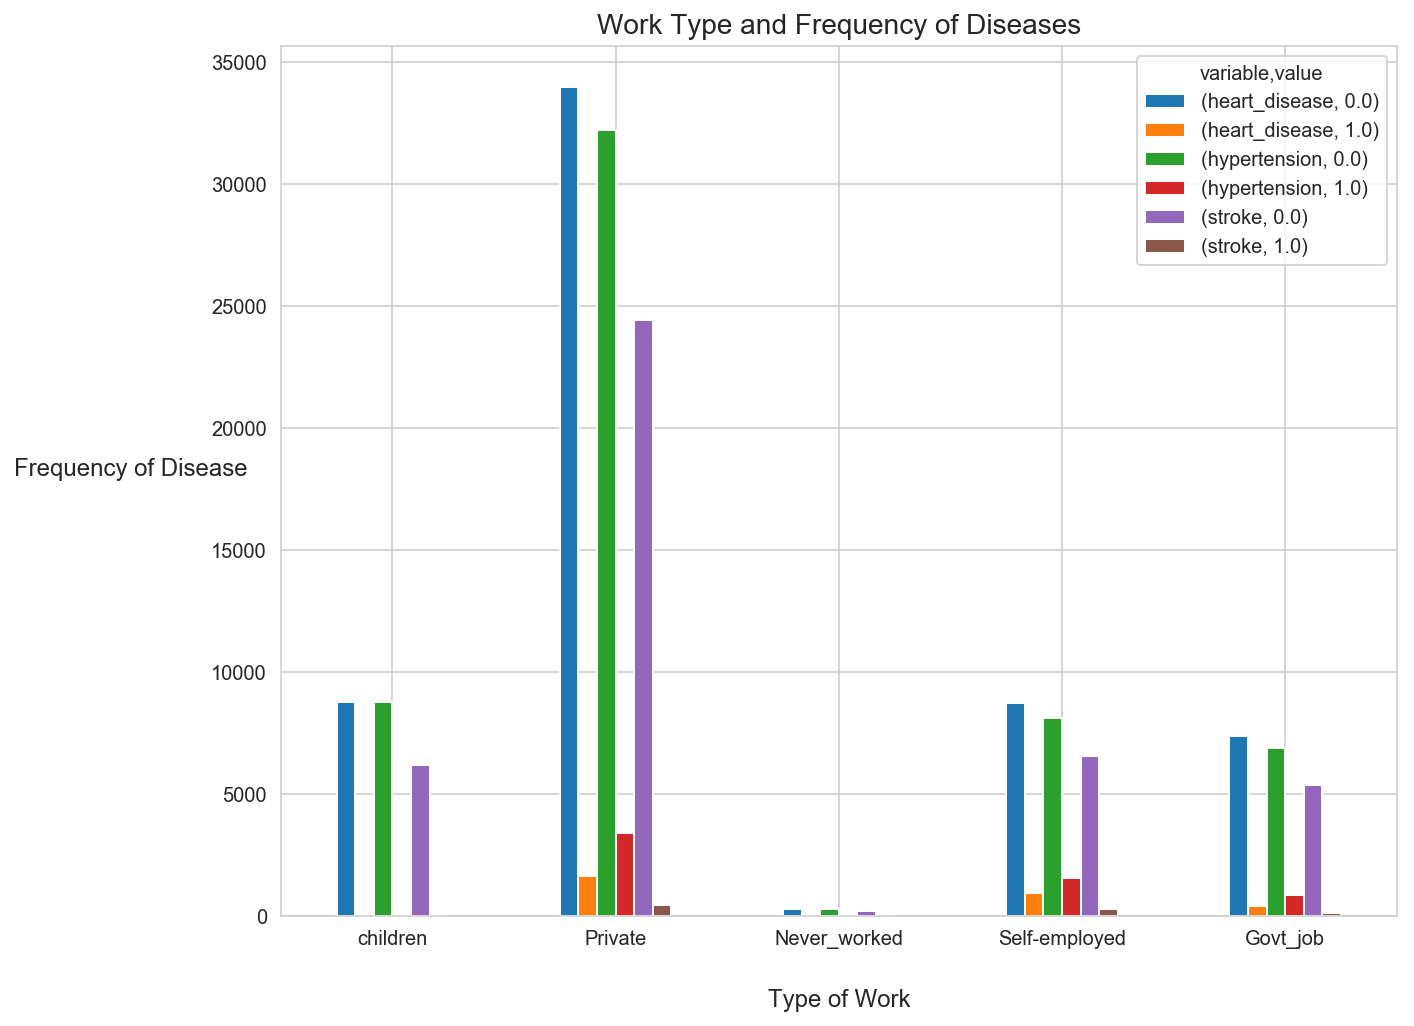

In [47]:
m2.plot(kind = 'bar', figsize = (10,8))
plt.title('Work Type and Frequency of Diseases', fontsize = 14)
plt.xlabel('Type of Work', fontsize = 12, labelpad = 20)
plt.xticks(rotation=0)
plt.ylabel('Frequency of Disease', fontsize = 12, rotation = 360, labelpad = 40)
plt.savefig('Types_of_work_&_Frequency_of_Disease');

In [ ]:
# pd.crosstab(data['work_type'], data['stroke']).plot(kind = 'bar')
# plt.title('Work Type and Frequency of Stroke')
# plt.xlabel('Work Type')
# plt.ylabel('Frequency of Stroke')
# plt.savefig('Types_of_work_&_Frequency_of_Stroke')

### <font color = blue>Conclusion: In terms of lifestyle behaviour, there is a trend in smoking pattern for those working different sectors. The highest no. of smokers come from those who work in Private sector, then self-employed, govt-jobs and lastly children (assuming most are non-smokers to begin with). In terms of work type also, heart disease is the most significant, other than stroke incidence, among other conditions like hypertension. <font>

## <font color = red>Marital Status and stroke as well as existing conditions like heart disease and hypertension.<font>

In [48]:
cols = ['stroke', 'hypertension', 'heart_disease']
m3 = (merged.melt(id_vars='ever_married', value_vars=cols)
         .groupby([pd.Grouper(key='ever_married'),'variable', 'value'])
         .size()
         .unstack(level=[1,2], fill_value=0))
m3

variable     heart_disease       hypertension       stroke     
value                  0.0   1.0          0.0   1.0    0.0  1.0
ever_married                                                   
No                   21893   231        21573   551  15382   80
Yes                  37152  2725        34634  5243  27235  703

In [49]:
res9 = pd.crosstab(merged['ever_married'], merged['stroke'])
print (res9)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res9)

print ('chi2 = ', chi2, 'p-value = ', p)

stroke          0.0  1.0
ever_married            
No            15382   80
Yes           27235  703
chi2 =  223.3560107615051 p-value =  1.6763961138161355e-50


In [50]:
res10 = pd.crosstab(merged['ever_married'], merged['hypertension'])
print (res10)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res10)

print ('chi2 = ', chi2, 'p-value = ', p)

hypertension      0     1
ever_married             
No            21573   551
Yes           34634  5243
chi2 =  1906.4868299788159 p-value =  0.0


In [52]:
res11 = pd.crosstab(merged['ever_married'], merged['heart_disease'])
print (res11)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res11)

print ('chi2 = ', chi2, 'p-value = ', p)

heart_disease      0     1
ever_married              
No             21893   231
Yes            37152  2725
chi2 =  1049.1479666159116 p-value =  3.728399330340043e-230


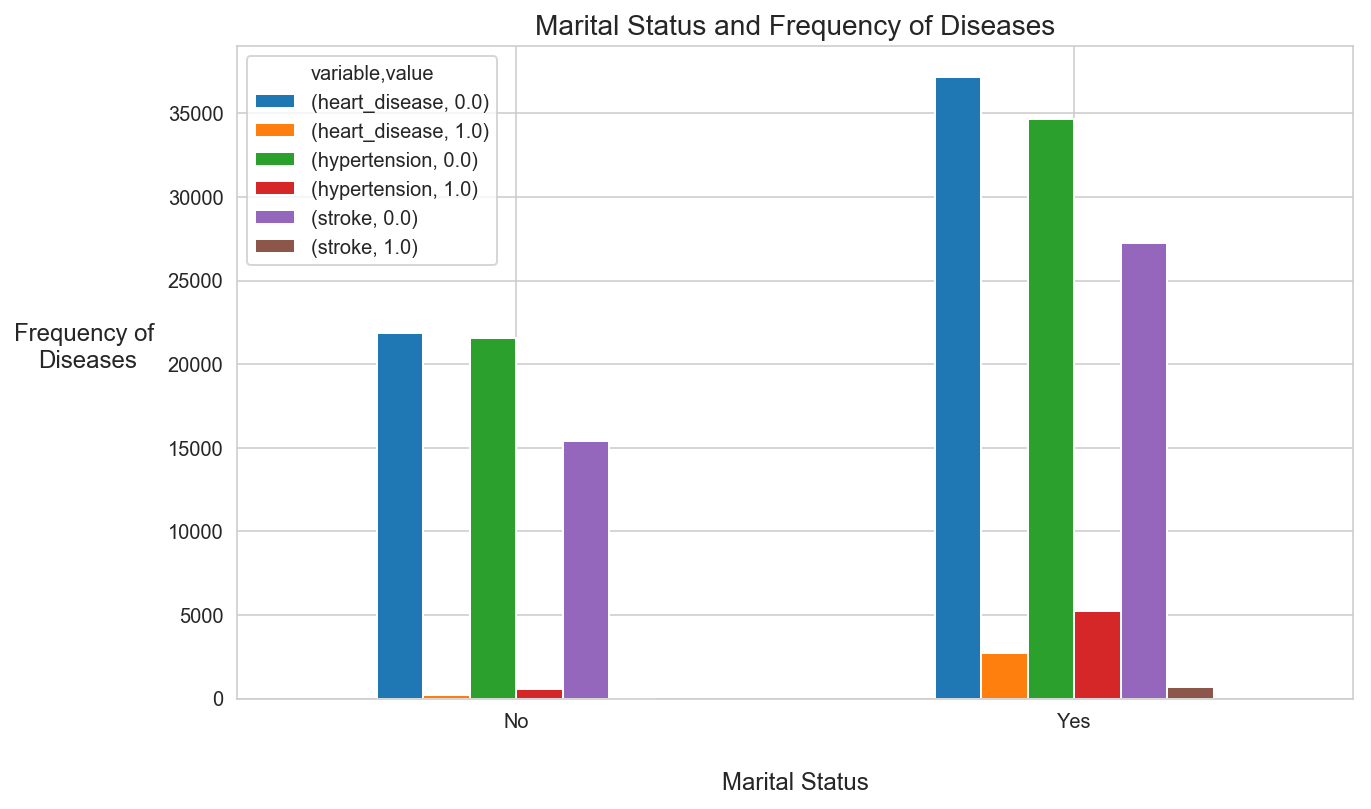

In [57]:
m3.plot(kind = 'bar', figsize = (10,6))
plt.title('Marital Status and Frequency of Diseases', fontsize = 14)
plt.xlabel('Marital Status', fontsize = 12, labelpad = 20)
plt.xticks(rotation=0)
plt.ylabel('Frequency of \nDiseases', fontsize = 12, rotation = 360, labelpad = 40)
plt.savefig('Marital_status_&_Frequency_of_Disease');

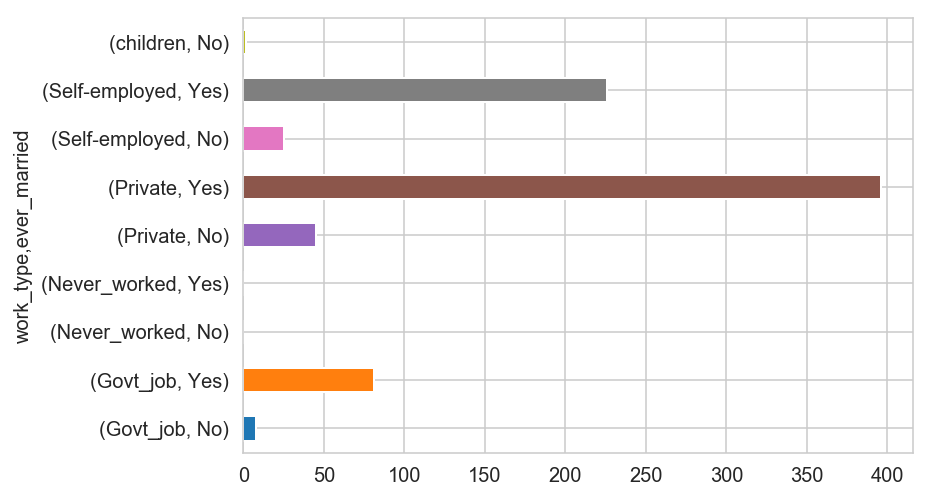

In [54]:
merged.groupby(['work_type', 'ever_married'])['stroke'].sum().plot(kind = 'barh')

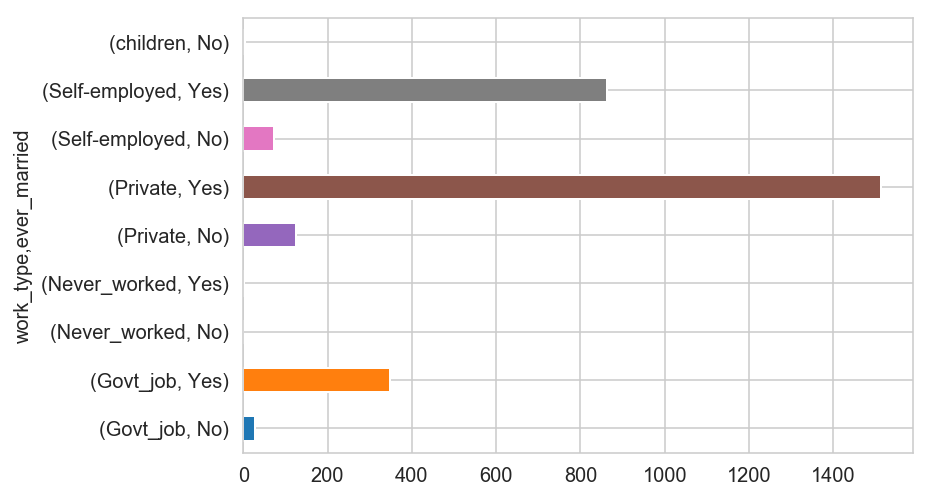

In [55]:
merged.groupby(['work_type', 'ever_married'])['heart_disease'].sum().plot(kind = 'barh')

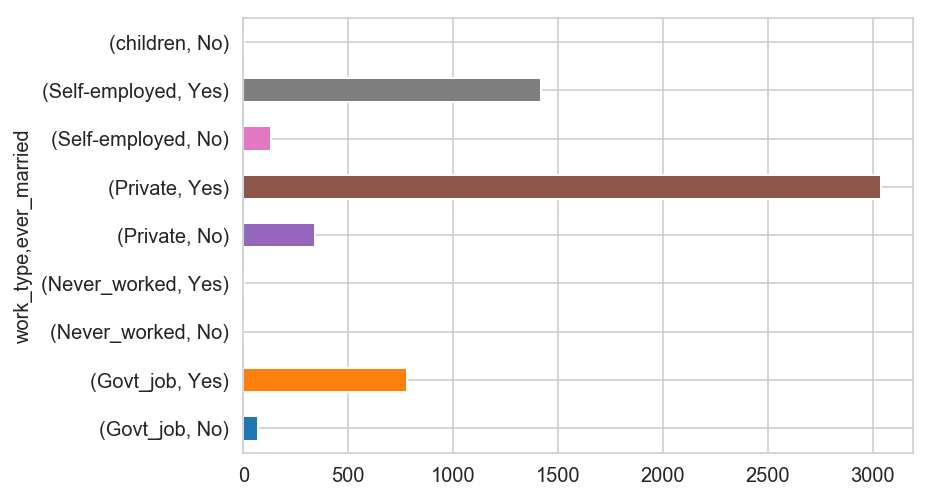

In [56]:
merged.groupby(['work_type', 'ever_married'])['hypertension'].sum().plot(kind = 'barh')

### <font color = blue>Conclusion: In terms of marital status, there is a significance in those who were married suffering more from heart disease and stroke but not hypertension. This could be due to stressors externally. Those who are married and working in the first 3 sectors (Private, self-employed and govt jobs) have higher incidence of stroke and heart disease. Partly could be due to their limited physical activities and long working hours.<font>

## <font color = red>Marital Status, smoking status and work type. How do all these relate to stroke?<font>

In [58]:
cols = ['work_type', 'ever_married', 'smoking_status']
m4 = (merged.melt(id_vars='stroke', value_vars=cols)
         .groupby([pd.Grouper(key='stroke'),'variable', 'value'])
         .size()
         .unstack(level=[1,2], fill_value=0))
m4

variable ever_married         smoking_status                     work_type  \
value              No    Yes formerly smoked never smoked smokes  Govt_job   
stroke                                                                       
0.0             15382  27235            7272        15769   6429      5351   
1.0                80    703             221          284    133        89   

variable                                              
value    Never_worked Private Self-employed children  
stroke                                                
0.0               177   24393          6542     6154  
1.0                 0     441           251        2

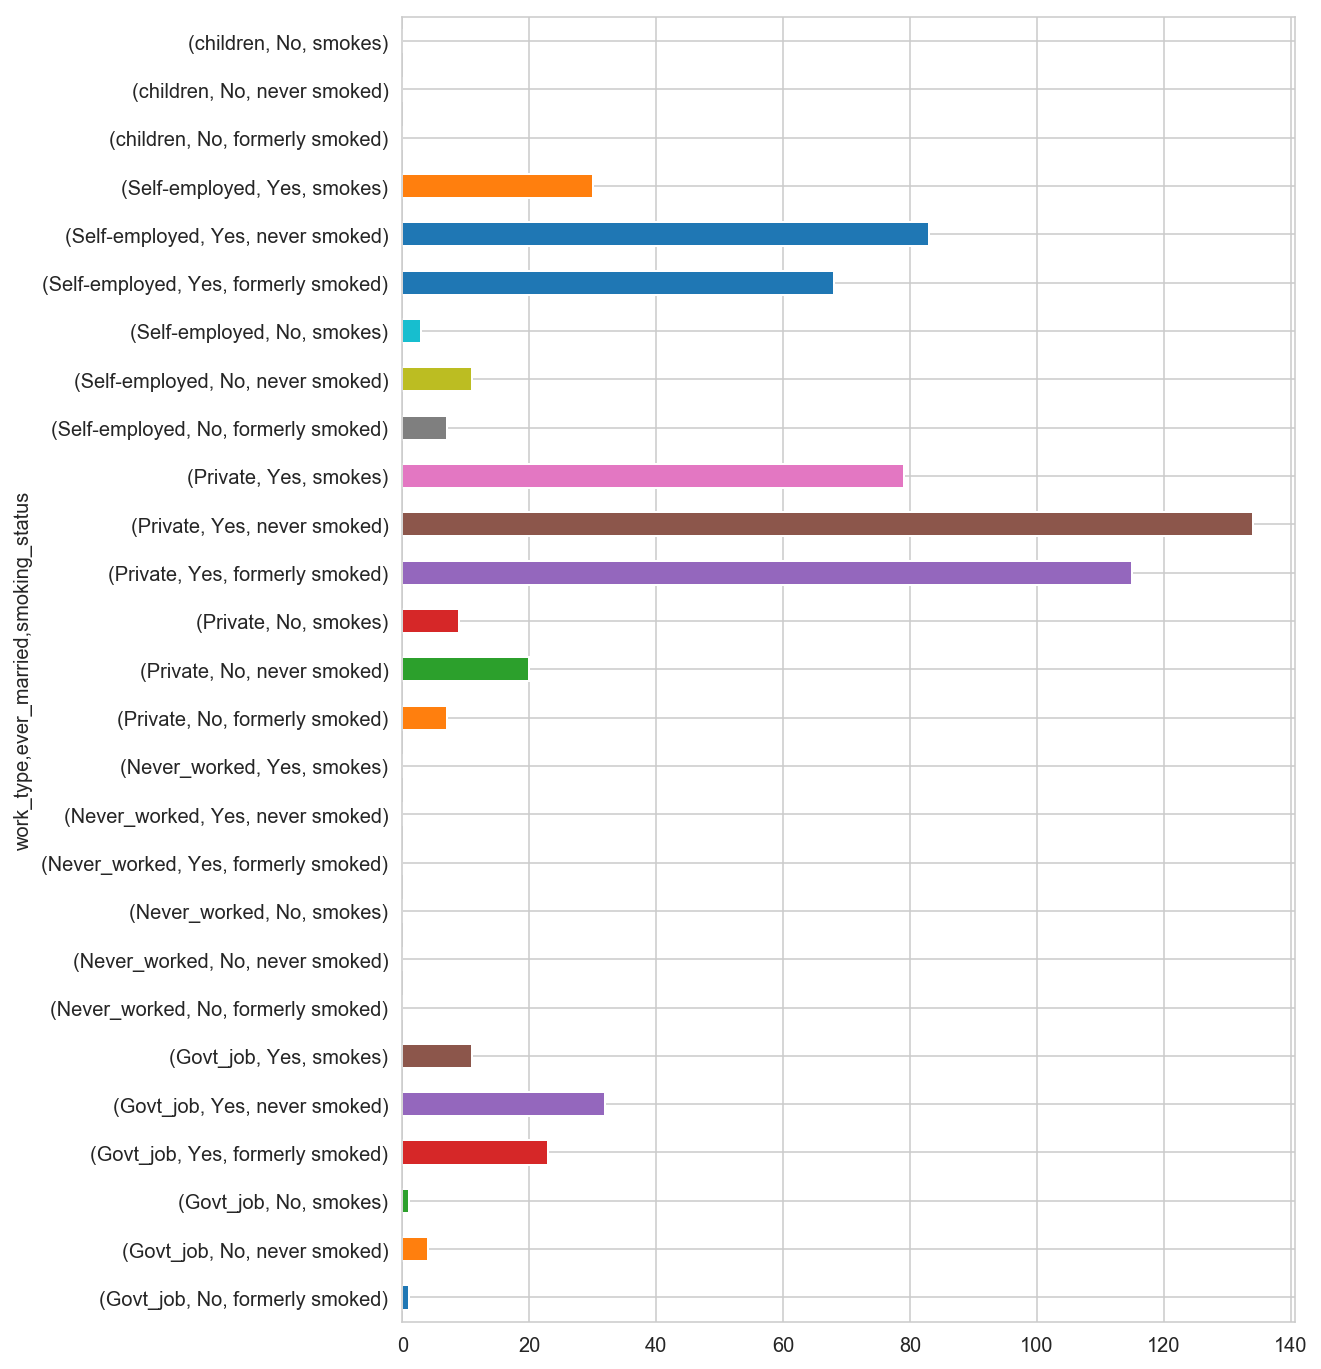

In [59]:
merged.groupby(['work_type', 'ever_married', 'smoking_status'])['stroke'].sum().plot(kind = 'barh', figsize = (8,12))

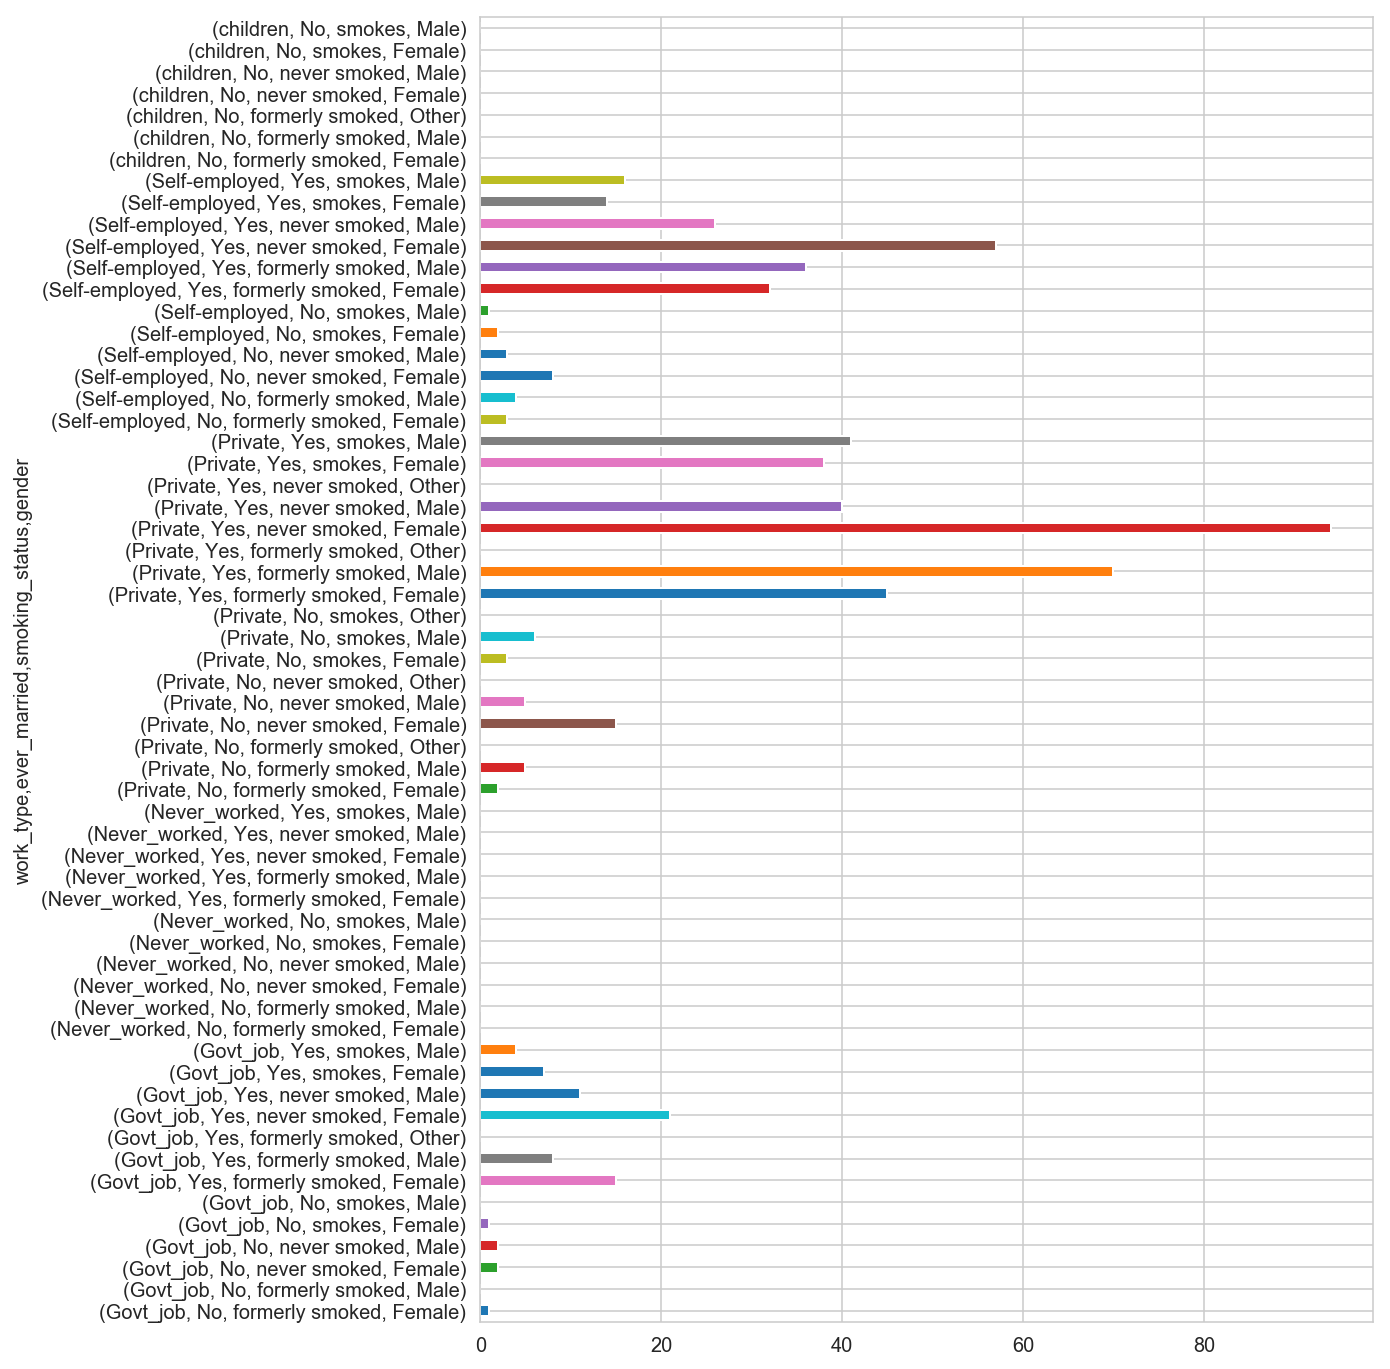

In [60]:
merged.groupby(['work_type', 'ever_married', 'smoking_status', 'gender'])['stroke'].sum().plot(kind = 'barh', figsize = (8,12))

### <font color = blue>Conclusion: Work type, marital status and smoking status, how do these 3 relate? From here, there's a higher incidence of stroke in those who never smoke, married and working. But, combining those who are married AND WORKING AND smoke as well as those who have quit, there is higher incidence of stroke. These could be due to them being a breadwinner in the family, pressured to bring the bacon back home.<font>

## <font color = red>Smoking status and gender<font>

In [61]:
merged.groupby(['smoking_status', 'gender']).size()

smoking_status   gender
formerly smoked  Female     5907
                 Male       4840
                 Other         6
never smoked     Female    15018
                 Male       7866
                 Other         2
smokes           Female     5199
                 Male       4119
                 Other         1
dtype: int64

In [62]:
res12 = pd.crosstab(merged['gender'], merged['smoking_status'])
print (res12)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res12)

print ('chi2 = ', chi2, 'p-value = ', p)

smoking_status  formerly smoked  never smoked  smokes
gender                                               
Female                     5907         15018    5199
Male                       4840          7866    4119
Other                         6             2       1
chi2 =  483.58734003100625 p-value =  2.374546687749055e-103


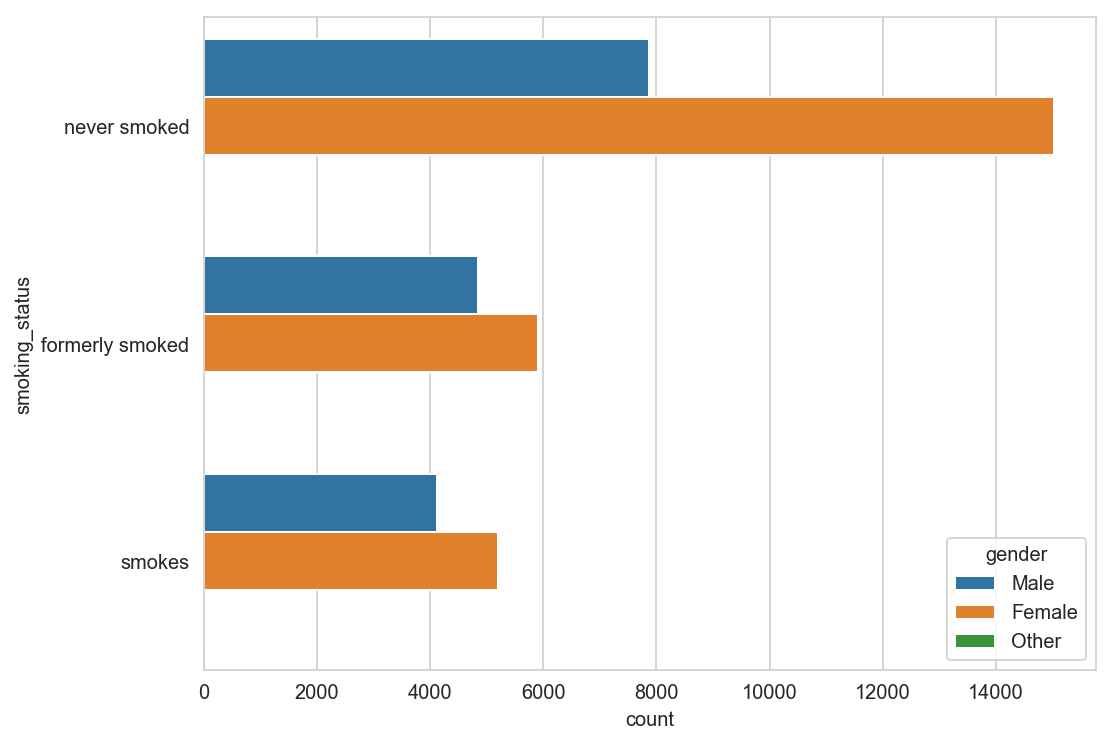

In [63]:
plt.figure(figsize = (8,6))
ax = sns.countplot(y="smoking_status", hue="gender", data=merged, orient = 'h')
ax

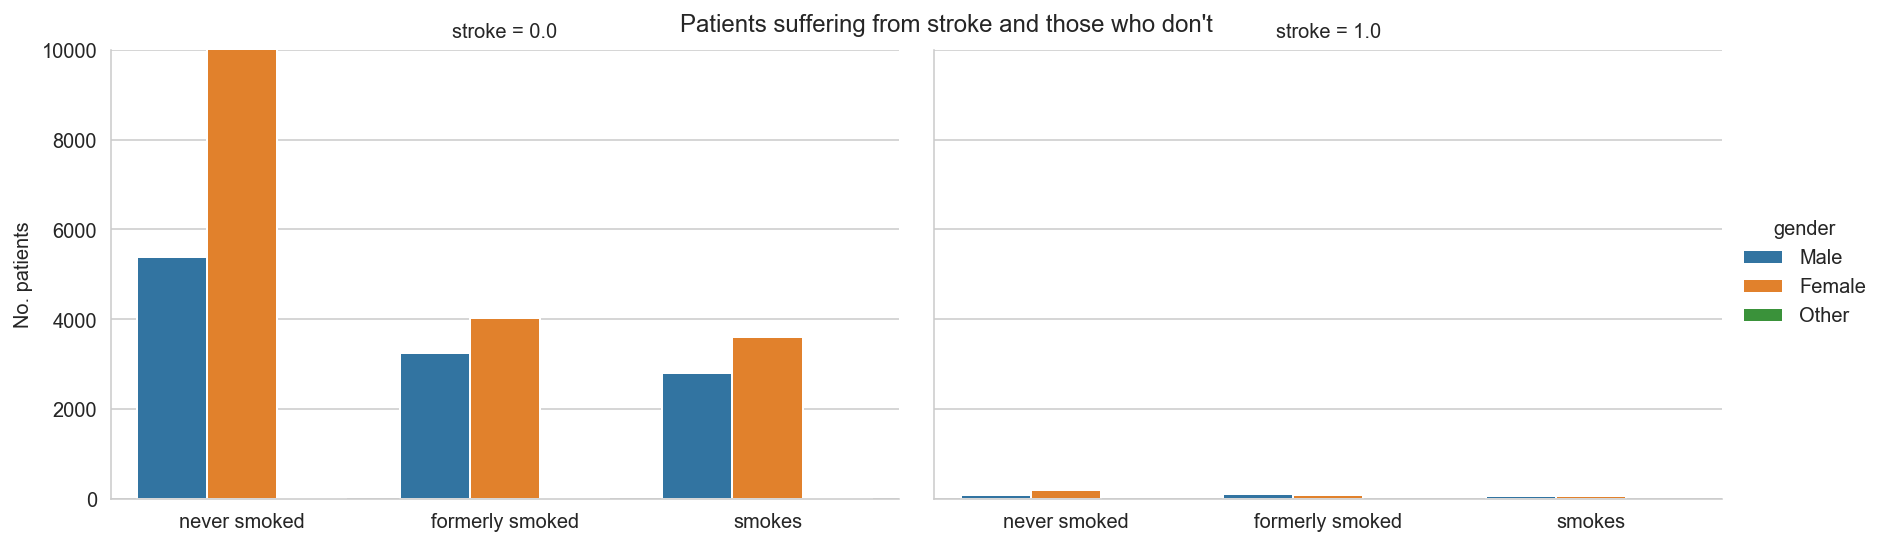

In [64]:
d2 = sns.catplot(x="smoking_status", hue="gender", col="stroke",data=merged, kind="count", height=4, aspect=1.5)
d2.set_axis_labels("", "No. patients")  
# d2.set_xticklabels(["Men", "Women", "Children"])
# d2.set_titles("{col_name} {col_var}")
d2.set(ylim=(10, 10000))
d2.fig.suptitle("Patients suffering from stroke and those who don't");

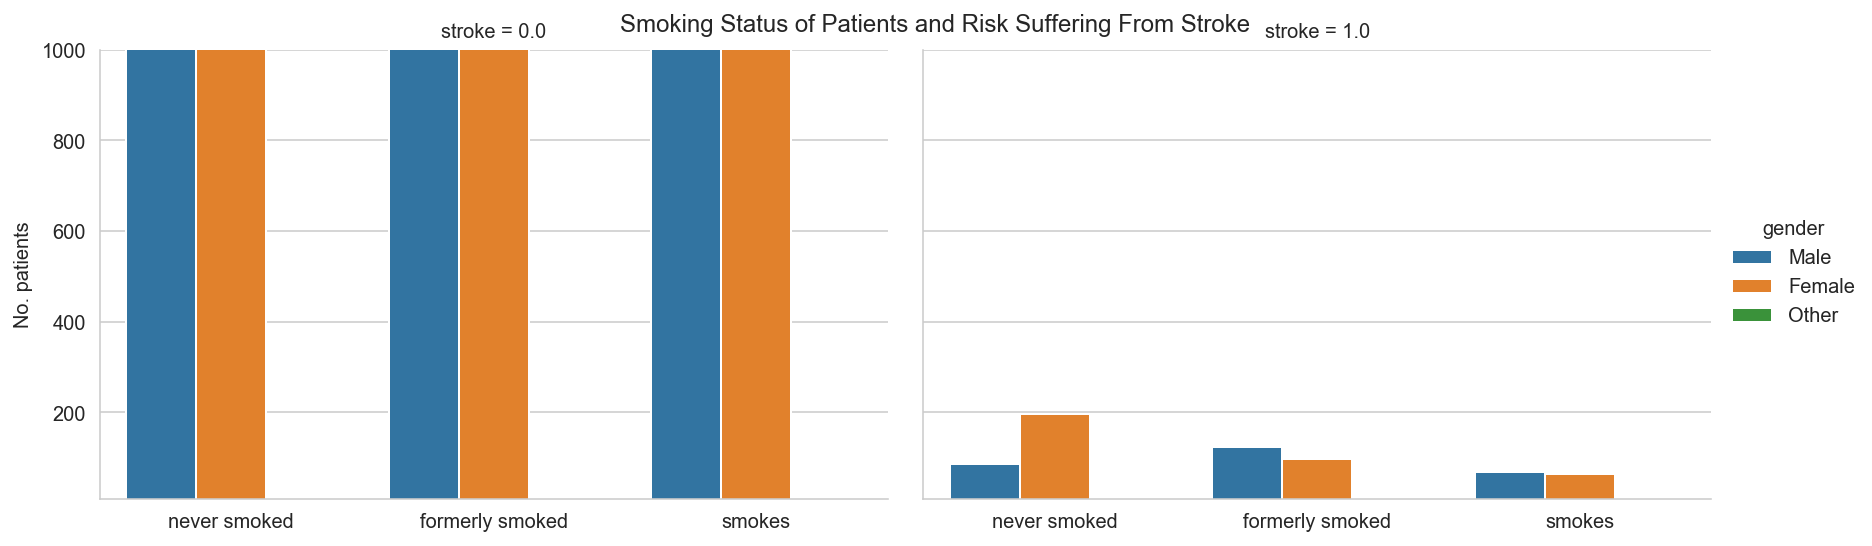

In [66]:
d2 = sns.catplot(x="smoking_status", hue="gender", col="stroke",data=merged, kind="count", height=4, aspect=1.5)
d2.set_axis_labels("", "No. patients")  
# d2.set_xticklabels(["Men", "Women", "Children"])
# d2.set_titles("{col_name} {col_var}")
d2.set(ylim=(10, 1000))
d2.fig.suptitle("Smoking Status of Patients and Risk Suffering From Stroke");

### <font color = blue>Conclusion: There is a significant difference in smoking behaviors between gender.<font>

In [ ]:
d2 = sns.catplot(x="hypertension", hue="gender", col="stroke",data=merged, kind="count", height=4, aspect=1.5)
d2.set_axis_labels("", "No. patients")  
# d2.set_xticklabels(["Men", "Women", "Children"])
# d2.set_titles("{col_name} {col_var}")
d2.set(ylim=(10, 22000))
d2.fig.suptitle("Patients suffering from stroke and those who don't");

## <font color = red>Residence type and diseases?<font>

In [67]:
res13 = pd.crosstab(merged['Residence_type'], merged['smoking_status'])
print (res13)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res13)

print ('chi2 = ', chi2, 'p-value = ', p)

smoking_status  formerly smoked  never smoked  smokes
Residence_type                                       
Rural                      5460         11375    4581
Urban                      5293         11511    4738
chi2 =  5.677286313177693 p-value =  0.05850499425026749


In [68]:
res14 = pd.crosstab(merged['Residence_type'], merged['stroke'])
print (res14)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res14)

print ('chi2 = ', chi2, 'p-value = ', p)

stroke            0.0  1.0
Residence_type            
Rural           21260  384
Urban           21357  399
chi2 =  0.1866443482985896 p-value =  0.6657242966461914


In [69]:
res15 = pd.crosstab(merged['Residence_type'], merged['hypertension'])
print (res15)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res15)

print ('chi2 = ', chi2, 'p-value = ', p)

hypertension        0     1
Residence_type             
Rural           28055  2880
Urban           28152  2914
chi2 =  0.08203595999273385 p-value =  0.7745570684419488


In [70]:
res16 = pd.crosstab(merged['Residence_type'], merged['heart_disease'])
print (res16)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res16)

print ('chi2 = ', chi2, 'p-value = ', p)

heart_disease       0     1
Residence_type             
Rural           29441  1494
Urban           29604  1462
chi2 =  0.49279238344381376 p-value =  0.482684323369698


In [71]:
res17 = pd.crosstab(merged['Residence_type'], merged['gender'])
print (res17)

# Chi square test
chi2, p, dof, ex = chi2_contingency(res17)

print ('chi2 = ', chi2, 'p-value = ', p)

gender          Female   Male  Other
Residence_type                      
Rural            18267  12661      7
Urban            18355  12705      6
chi2 =  0.08791784151095894 p-value =  0.9569932692261036


### <font color = blue>Conclusion: No significant difference in the residence type with conditions like stroke, heart disease and hypertension.<font>

## <font color = red>Scatterplots<font>

In [116]:
merged1[merged1['stroke']==1]['age'].mean()

68.49452554744525

In [ ]:
#### Average glucose level against age and those who suffer from stroke
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
# colors = [i for i in data_adult['age'] if i is 1 in data_adult['stroke']]
colors = ['red' if i == 1 else 'blue' for i in merged['stroke']]
ax1.scatter(merged['age'], merged['avg_glucose_level'], s=10, c=colors, marker="s")
plt.legend(loc='upper left')
plt.title('Chances of suffering from stroke through patients age and mean glucose level', fontsize = 14)
plt.xlabel('Age', fontsize = 12, labelpad = 20)
plt.xticks(rotation=0)
plt.ylabel('Average Glucose Level \n(measured after meal)\n', fontsize = 12, rotation = 360, labelpad = 70)
plt.savefig("Patient's age and glucose level in chances of suffering from stroke");

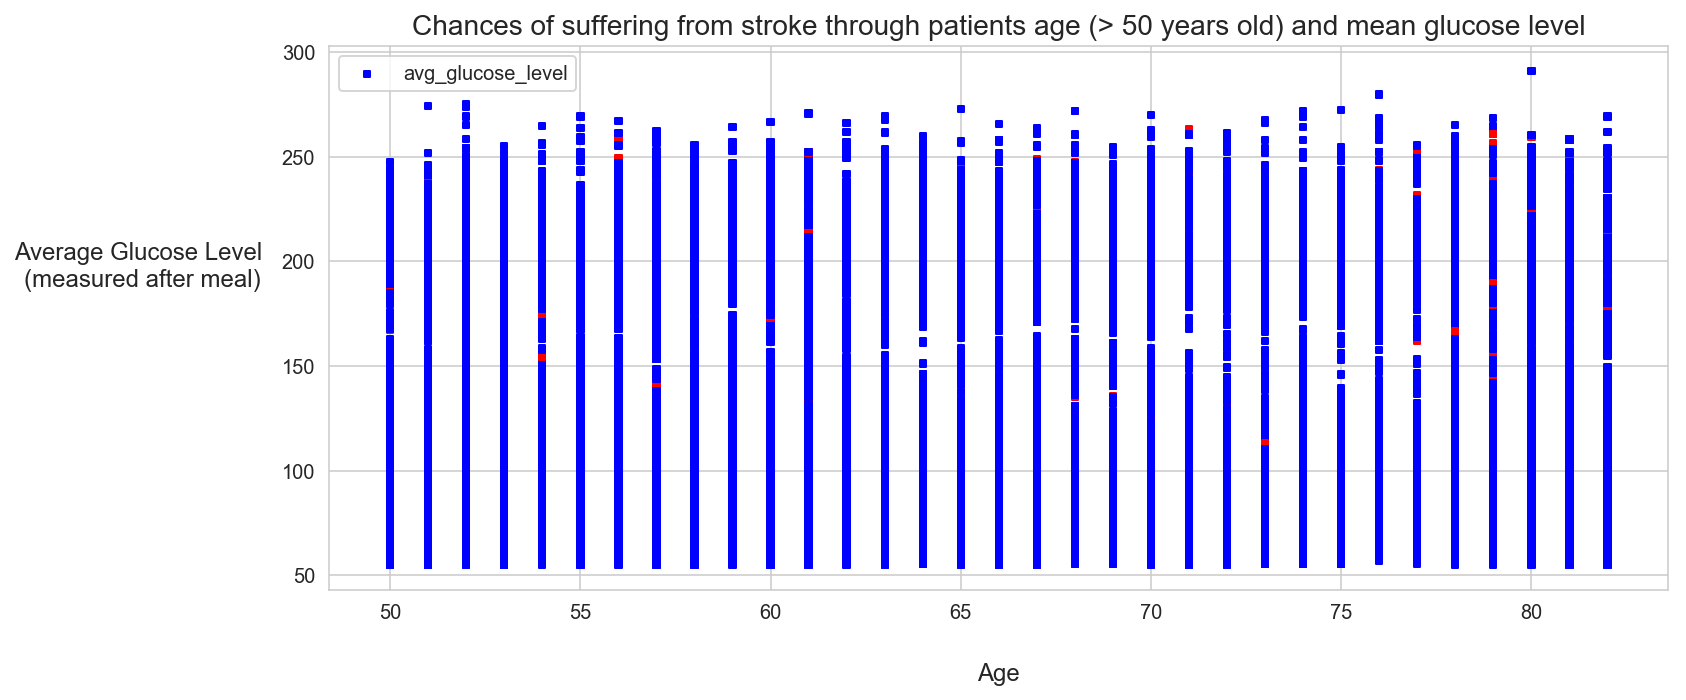

In [25]:
# Average glucose level against age and those who suffer from stroke
x = merged[merged['age'] >= 50.0]
x
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
# colors = [i for i in data_adult['age'] if i is 1 in data_adult['stroke']]
colors = ['red' if i == 1 else 'blue' for i in x['stroke']]
ax1.scatter(x['age'], x['avg_glucose_level'], s=10, c=colors, marker="s")
plt.legend(loc='upper left')
plt.title('Chances of suffering from stroke through patients age (> 50 years old) and mean glucose level', fontsize = 14)
plt.xlabel('Age', fontsize = 12, labelpad = 20)
plt.xticks(rotation=0)
plt.ylabel('Average Glucose Level \n(measured after meal)\n', fontsize = 12, rotation = 360, labelpad = 70)
plt.savefig("Patient's age and glucose level in chances of suffering from stroke");

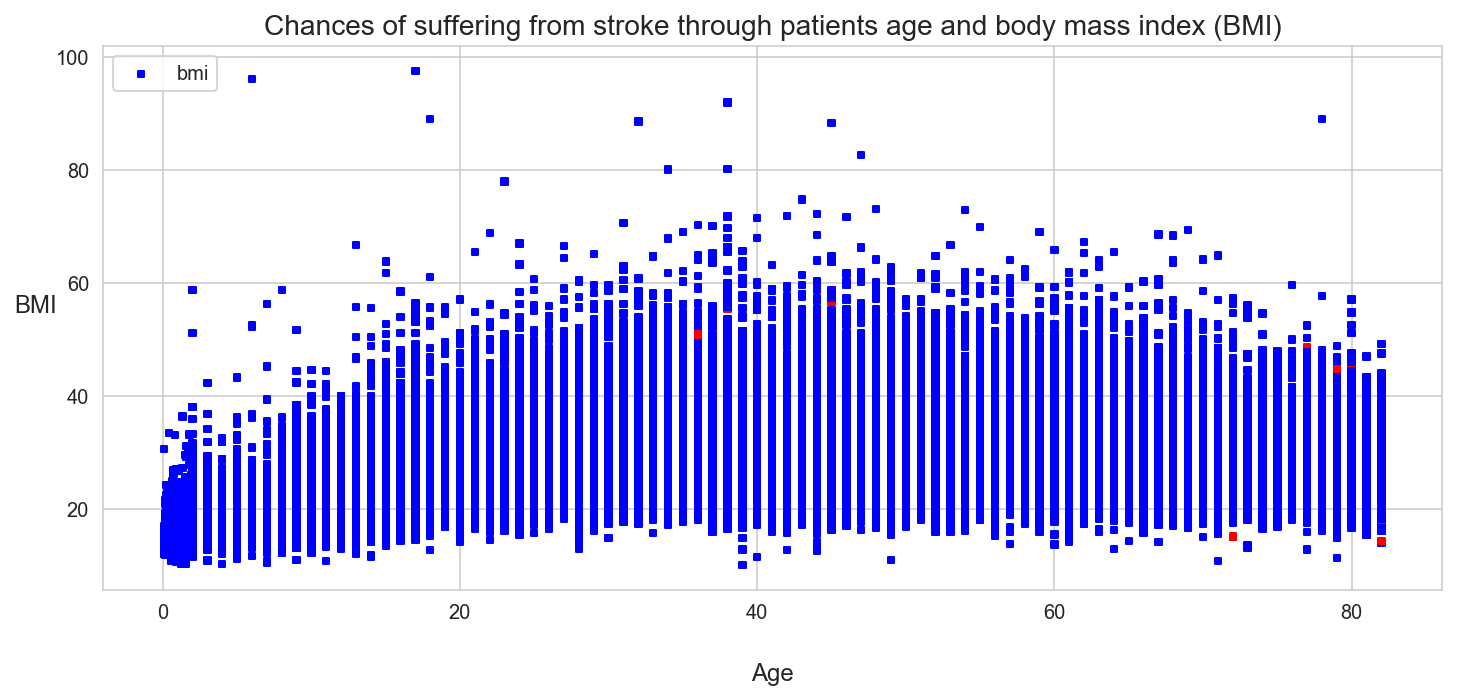

In [17]:
# BMI against age and those who suffer from stroke
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
# colors = [i for i in data_adult['age'] if i is 1 in data_adult['stroke']]
colors = ['red' if i == 1 else 'blue' for i in merged['stroke']]
ax1.scatter(merged['age'], merged['bmi'], s=10, c=colors, marker="s")
plt.legend(loc='upper left')
plt.title('Chances of suffering from stroke through patients age and body mass index (BMI)', fontsize = 14)
plt.xlabel('Age', fontsize = 12, labelpad = 20)
plt.xticks(rotation=0)
plt.ylabel('BMI', fontsize = 12, rotation = 360, labelpad = 10)
plt.savefig("Patient's age and BMI in chances of suffering from stroke")

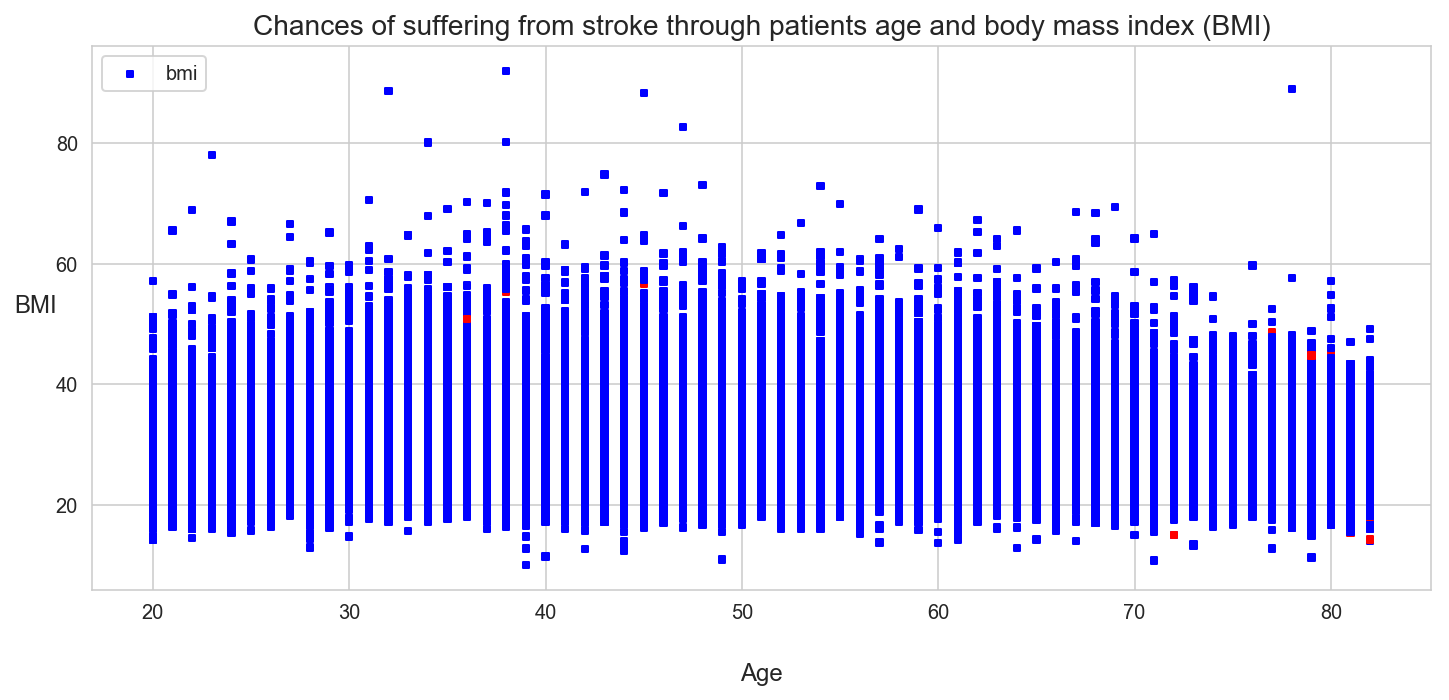

In [15]:
# (Zoom in for those who are in the age of 20 years old and above as symptoms are easier in this
# age group as to those below 20 years old) 
# BMI against age and those who suffer from stroke
x = merged[merged['age'] >= 20.0]
x
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
# colors = [i for i in data_adult['age'] if i is 1 in data_adult['stroke']]
colors = ['red' if i == 1 else 'blue' for i in x['stroke']]
ax1.scatter(x['age'], x['bmi'], s=10, c=colors, marker="s")
plt.legend(loc='upper left')
plt.title('Chances of suffering from stroke through patients age and body mass index (BMI)', fontsize = 14)
plt.xlabel('Age', fontsize = 12, labelpad = 20)
plt.xticks(rotation=0)
plt.ylabel('BMI', fontsize = 12, rotation = 360, labelpad = 10)
plt.savefig("Patient's age and BMI in chances of suffering from stroke")

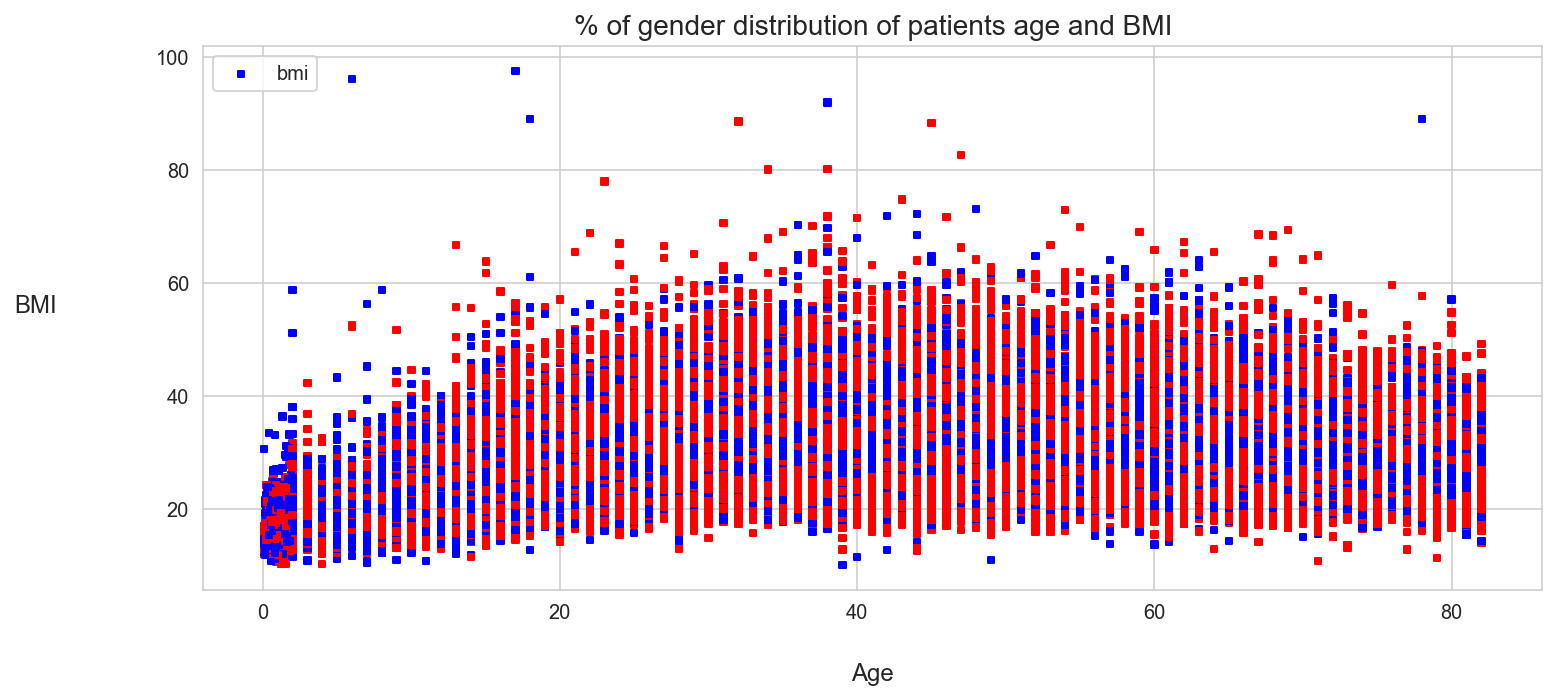

In [19]:
# BMI against age and distribution of gender
# Conclusion: Seems like it's understandable that females have a higher BMI as compared to 
# their male counterparts within the same age range
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
colors = ['red' if i == 'Female' else 'blue' for i in merged['gender']]
ax1.scatter(merged['age'], merged['bmi'], s=10, c=colors, marker="s")
plt.legend(loc='upper left')
plt.title('Gender distribution of patients age and BMI', fontsize = 14)
plt.xlabel('Age', fontsize = 12, labelpad = 20)
plt.xticks(rotation=0)
plt.ylabel('BMI', fontsize = 12, rotation = 360, labelpad = 60)
plt.savefig("Patient's age, gender and bmi")

## <font color = red>Extras<font>

In [ ]:
f_oneway(data_adult1['bmi'][data_adult1['gender'] == 'Male'], 
             data_adult1['bmi'][data_adult1['gender'] == 'Female'],
             data_adult1['bmi'][data_adult1['gender'] == 'Other'])

In [ ]:
f_oneway(data_adult1['bmi'][data_adult1['work_type'] == 'Govt_job'], 
             data_adult1['bmi'][data_adult1['work_type'] == 'Never_worked'],
             data_adult1['bmi'][data_adult1['work_type'] == 'Private'],
            data_adult1['bmi'][data_adult1['work_type'] == 'Self-employed'])

In [ ]:
f_oneway(data_adult1['hypertension'][data_adult1['work_type'] == 'Govt_job'], 
             data_adult1['hypertension'][data_adult1['work_type'] == 'Never_worked'],
             data_adult1['hypertension'][data_adult1['work_type'] == 'Private'],
            data_adult1['hypertension'][data_adult1['work_type'] == 'Self-employed'])

In [ ]:
data_adult[(data_adult['stroke']==1) & (data_adult['hypertension']==1)].head()

In [ ]:
data_adult[(data_adult['stroke']==1) & (data_adult['heart_disease']==1)].head()

In [ ]:
data_adult[(data_adult['stroke']==1) & (data_adult['hypertension']==1) & (data_adult['heart_disease']==1)].head()

In [ ]:
data_adult[(data_adult['stroke']==1) & (data_adult['hypertension']==1) 
           & (data_adult['heart_disease']==1) & (data_adult['smoking_status']=='formerly smoked')].head()

In [ ]:
data_adult[(data_adult['stroke']==1) & (data_adult['hypertension']==0)].head()

In [ ]:
data_adult[(data_adult['stroke']==1) & (data_adult['heart_disease']==0)].head()

In [ ]:
data_adult[(data_adult['stroke']==1) & (data_adult['hypertension']==0) & (data_adult['heart_disease']==0)].head()

In [ ]:
data_adult[(data_adult['stroke']==1) & (data_adult['avg_glucose_level']>=180)].head()

In [ ]:
len(data_adult[(data_adult['stroke']==1) & (data_adult['avg_glucose_level']>=180) & (data_adult['hypertension'] == 1)])

In [ ]:
len(data_adult[(data_adult['stroke']==1) & (data_adult['avg_glucose_level']>=180) & (data_adult['hypertension'] == 1) & (data_adult['gender'] == 'Male')])

In [ ]:
len(data_adult[(data_adult['stroke']==1) & (data_adult['avg_glucose_level']>=180) & (data_adult['hypertension'] == 1) & (data_adult['gender'] == 'Other')])

In [ ]:
len(data_adult[(data_adult['stroke']==1) & (data_adult['avg_glucose_level']>=180) & (data_adult['hypertension'] == 1) & (data_adult['gender'] == 'Female')])

In [ ]:
len(data_adult[(data_adult['stroke']==0) & (data_adult['avg_glucose_level']>=180) & (data_adult['hypertension'] == 1)])

In [ ]:
len(data_adult[(data_adult['avg_glucose_level']>=180) & (data_adult['hypertension'] == 1)])

In [ ]:
data_adult[(data_adult['stroke']==1) & (data_adult['avg_glucose_level']>=180)].head()

In [ ]:
data_adult['gender'].value_counts()

In [ ]:
fig = plt.figure(figsize = (8,10))
ax = sns.boxplot(x="gender", y="bmi", data=data_adult)

In [ ]:
ax = sns.violinplot(x="gender", y="bmi", hue = "stroke", data=data_adult, split = True)

In [22]:
# Statistical testings
# Mean of avg_glucose_level for patients with stroke vs Mean of avg_glucose_level 
# for patients without stroke. Is there any statistical differences? 

ttest_ind(merged0['avg_glucose_level'][merged0['stroke'] == 1], 
          merged0['avg_glucose_level'][merged0['stroke'] == 0])

Ttest_indResult(statistic=12.90130959278374, pvalue=5.626501251621874e-38)

In [21]:
merged0 = merged.dropna()
ttest_ind(merged0['bmi'][merged0['stroke'] == 1], 
          merged0['bmi'][merged0['stroke'] == 0])

Ttest_indResult(statistic=-0.6868979657523538, pvalue=0.4921525082494467)

In [ ]:
ttest_ind(data_adult1['bmi'][data_adult1['heart_disease'] == 1], 
          data_adult1['bmi'][data_adult1['heart_disease'] == 0])

In [ ]:
ttest_ind(data_adult1['bmi'][data_adult1['age'] > 55.0],
          data_adult1['bmi'][data_adult1['age'] <= 55.0])

In [ ]:
#  BMI for older adults: https://www.huffingtonpost.ca/2014/03/26/bmi-older-adults-_n_5037122.html
    
ttest_ind(data_adult1['bmi'][data_adult1['age'] > 65.0],
          data_adult1['bmi'][data_adult1['age'] <= 65.0])

In [ ]:
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
# colors = [i for i in data_adult['age'] if i is 1 in data_adult['stroke']]
colors = ['red' if i == 1 else 'blue' for i in data_adult['stroke']]
ax1.scatter(data_adult['age'], data_adult['bmi'], s=10, c=colors, marker="s")
plt.legend(loc='upper left');
plt.show()

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.countplot(y="55yo or not", hue="stroke", data=data_adult, orient = 'h')
ax.set_title ('Risk of Getting Stroke For Aged Individuals', fontsize = 14)
ax.set_xlabel ('No. of Patients', fontsize = 12)
ax.set_ylabel ('Age Groups', fontsize = 12, rotation = 360, labelpad = 20);

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.countplot(y="Residence_type", hue="stroke", data=data_adult, orient = 'h')
ax.set_title ('Risk of Getting Stroke For Aged Individuals', fontsize = 14)
ax.set_xlabel ('No. of Patients', fontsize = 12)
ax.set_ylabel ('Age Groups', fontsize = 12, rotation = 360, labelpad = 20);

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.countplot(y="work_type", hue="stroke", data=data_adult, orient = 'h')
ax.set_title ('Does work type plays a part in probability of getting stroke?', fontsize = 14)
ax.set_xlabel ('No. of Patients', fontsize = 12)
ax.set_ylabel ('Type of Work', fontsize = 12, rotation = 360, labelpad = 20);

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.countplot(y="ever_married", hue="stroke", data=data_adult, orient = 'h')
ax.set_title ('Marital Status and Risk of Getting Stroke', fontsize = 14)
ax.set_xlabel ('No. of Patients', fontsize = 12)
ax.set_ylabel ('Marital Status', fontsize = 12, rotation = 360, labelpad = 20);

In [ ]:
# chart3 = data_adult.groupby(['55yo or not', 'stroke']).size().plot(kind = 'barh')
# chart3.set_title ('Verbal vs Math SAT Scores Across US States', fontsize = 14)
# chart3.set_xlabel ('Score for Each Test', fontsize = 12)
# chart3.set_ylabel ('Frequency', fontsize = 12)
# chart3.set_yticklabels(('red', '1'), ('green', '2'), ('yellow', '3'), ('blue', '4'))
# chart3.legend(loc = 2)

In [ ]:
data_adult[(data_adult['stroke']==0) & (data_adult['avg_glucose_level'] > 140) & (data_adult['avg_glucose_level'] < 180) & 
           (data_adult['hypertension'] == 1) & (data_adult['bmi'] < 30.0)]